In [7]:
mbar = '2'
expirment_date = '2016_07_24'
expirment_number = '05'

expirement_tag = 'step_shear_data_' + mbar +'_mbar_' + expirment_date + '_Exp_' + expirment_number

intensity_filename = '../../step_shear_data/' + mbar +'_mbar/' + expirment_date + '/Exp_' + expirment_number + '/Compositeall/intensityrel.mat'
location_filename = '../../step_shear_data/' + mbar +'_mbar/' + expirment_date + '/Exp_' + expirment_number + '/Compositeall/location.mat'

base_path = './pickle/' + expirement_tag + '_'
base_path_artifacts = './artifacts/' + expirement_tag + "_"

%matplotlib inline

In [8]:
base_path_artifacts

'./artifacts/step_shear_data_2_mbar_2016_07_24_Exp_05_'

In [9]:
#import base porject to system path

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Load matlab data

In [10]:
import scipy.io
import numpy as np

intensity_matlab_file = scipy.io.loadmat(intensity_filename)

### Mean Response Curve

In [11]:
def calc_mean_response_curve(cells_intensity):
    avg_intensity = np.zeros((cells_intensity.shape[1]))
    
    min_intensity = np.zeros((cells_intensity.shape[1])) + 1
    max_intensity = np.zeros((cells_intensity.shape[1])) - 1

    for cell_idx,cell_intensity in enumerate(cells_intensity):
        avg_intensity += cell_intensity
        #min_intensity = np.minimum(min_intensity, cell_intensity)
        #max_intensity = np.maximum(max_intensity, cell_intensity)    
    
    std_intensity = np.std(cells_intensity, axis=0)    
    avg_intensity = avg_intensity / cells_intensity.shape[0]
    
    return avg_intensity, std_intensity

### Realtive Intensity

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


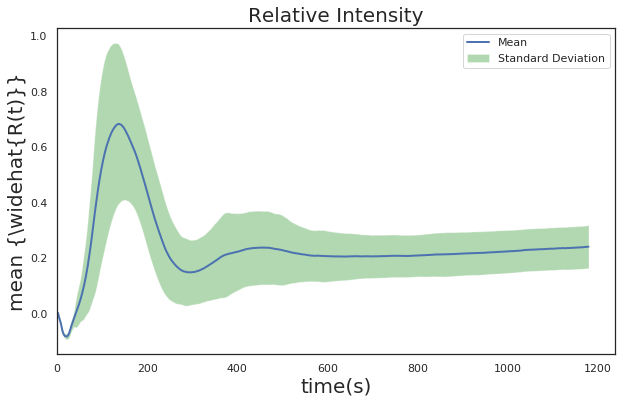

In [12]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

import peakutils
from peakutils.plot import plot as pplot
import seaborn as sns

mean_relative_intensity, std_relative_intensity = calc_mean_response_curve(intensity_matlab_file['intensity'])

rc('text', usetex=False)
sns.set(style='white', font_scale = 1, rc={"lines.linewidth": 1})

x = np.linspace(0, len(mean_relative_intensity), len(mean_relative_intensity))

x = x * 2

fig = plt.figure(figsize=(10,6))

plt.plot(x, mean_relative_intensity, lw=2, alpha=1 )

plt.fill_between(x, 
                 y1=mean_relative_intensity - std_relative_intensity, 
                 y2=mean_relative_intensity + std_relative_intensity, 
                 facecolor='Green', alpha=0.3)

plt.legend(['Mean', 'Standard Deviation'])

plt.title('Relative Intensity', fontsize=20)
plt.xlabel('time(s)', fontsize=20)
plt.ylabel('mean {\widehat{R(t)}}', fontsize=20)
plt.xlim(xmin=0)
fig.savefig(base_path_artifacts + '_relative_intensity' + '.eps', format='eps')
fig.savefig(base_path_artifacts + '_relative_intensity' + '.png')
plt.show()

In [13]:
example_cell_intensity = intensity_matlab_file['intensity'][245]

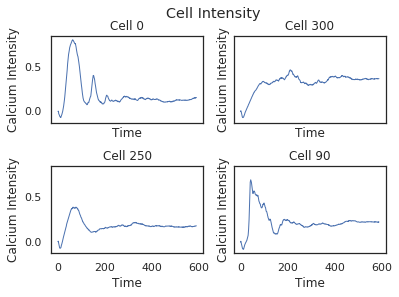

In [14]:
def plot_4_diffrent_response_curve(intensity_matlab_file, base_path_artifacts):
    import matplotlib
    import matplotlib.pyplot as plt

    def plot_intensity(ax, i):
        ax.plot(intensity_matlab_file['intensity'][i])
        ax.set_title('Cell ' + str(i))
        ax.set_xlabel('Time')
        ax.set_ylabel('Calcium Intensity')
    
    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
    plot_intensity(axes[0, 0], 0)
    plot_intensity(axes[0, 1], 300)
    plot_intensity(axes[1, 0], 250)
    plot_intensity(axes[1, 1], 90)

    fig.suptitle('Cell Intensity')

    plt.subplots_adjust(hspace = 0.5)
    plt.show()
    #fig.savefig(base_path_artifacts + '4_diffrent_response_curve.png')
    #plt.clf()
    #plt.close(fig)

plot_4_diffrent_response_curve(intensity_matlab_file, base_path_artifacts)

### Preprocessing - Smooth Signals

In [15]:
from module.preprocessing import smooth

cells_intensity = smooth(intensity_matlab_file['intensity'])

print('The shape of the signal\'s data:' + str(cells_intensity.shape))

The shape of the signal's data:(308, 590)


In [16]:
cells_intensity = cells_intensity[:, :]

## Preprocssing - Numerically Differentiated the Response Curve

In [17]:
from module.preprocessing import first_derive_cells_intensity

normalized_cells_response_curve = first_derive_cells_intensity(cells_intensity)

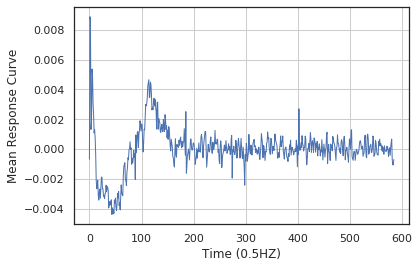

In [18]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(normalized_cells_response_curve[3])

ax.set(xlabel='Time (0.5HZ)', ylabel='Mean Response Curve')
ax.grid()

plt.show()

In [19]:
mean_normalized_cells_response_curve, std_normalized_cells_response_curve = calc_mean_response_curve(normalized_cells_response_curve)

## Mean Cross-Correlation

In [20]:
def calc_mean_cc(cells_intensity):
    from scipy.stats import pearsonr
    from itertools import combinations    
    
    cc_score = 0
    num = 0
    
    for i, j in combinations(cells_intensity, 2):
        num += 1        
        cc_score += pearsonr(i, j)[0]
    
    return cc_score / num
    
calc_mean_cc(cells_intensity)

0.6531341757293181

In [21]:
len(mean_normalized_cells_response_curve) *2

1170

## Find Peaks Analysis

[0, 485]


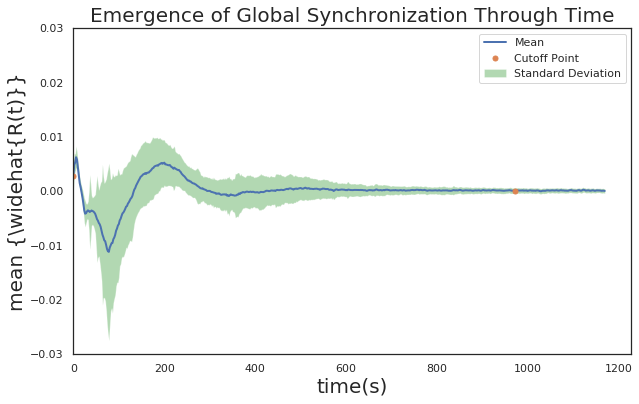

In [22]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

import peakutils
from peakutils.plot import plot as pplot
import seaborn as sns

rc('text', usetex=False)
sns.set(style='white', font_scale = 1, rc={"lines.linewidth": 1})


indexes = list(range(0, mean_normalized_cells_response_curve.shape[0], mean_normalized_cells_response_curve.shape[0]-100))

print(indexes)

x = np.linspace(0, len(mean_normalized_cells_response_curve), len(mean_normalized_cells_response_curve))

x = x * 2

fig = plt.figure(figsize=(10,6))

plt.plot(x, mean_normalized_cells_response_curve, lw=2, alpha=1 )
plt.plot(x[indexes],mean_normalized_cells_response_curve[indexes], marker="o", ls="", ms=5 )

plt.fill_between(x, 
                 y1=mean_normalized_cells_response_curve - std_normalized_cells_response_curve, 
                 y2=mean_normalized_cells_response_curve + std_normalized_cells_response_curve, 
                 facecolor='Green', alpha=0.3)

plt.legend(['Mean', 'Cutoff Point', 'Standard Deviation'])

plt.title('Emergence of Global Synchronization Through Time', fontsize=20)
plt.xlabel('time(s)', fontsize=20)
plt.ylabel('mean {\widehat{R(t)}}', fontsize=20)
plt.xlim(xmin=0)
plt.ylim(-0.03, 0.03)
plt.show()

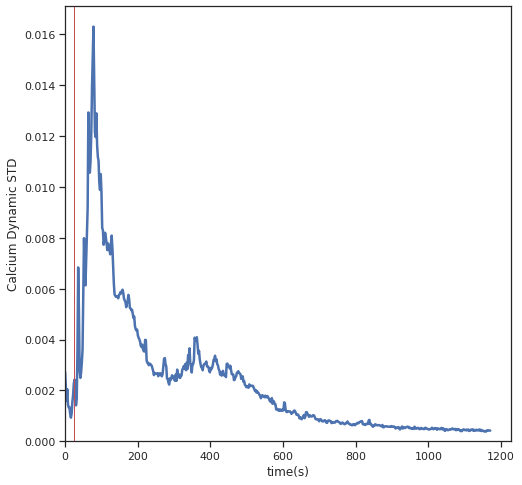

<Figure size 432x288 with 0 Axes>

In [23]:
import seaborn as sns

sns.set_style("ticks", {'axes.grid' : False, 'font_scale': 2, "xtick.major.size": 20, "ytick.major.size": 20})

fig = plt.figure(figsize=(8,8))

x = np.linspace(0, len(mean_normalized_cells_response_curve), len(mean_normalized_cells_response_curve))

x = x * 2

ax = sns.lineplot(y=std_normalized_cells_response_curve, x=x, palette="tab10", linewidth=2.5)

ax.set(xlabel="time(s)", ylabel="Calcium Dynamic STD")

ax.set(ylim=0)
ax.set(xlim=0)

plt.axvline(x=x[12], c='r')

plt.show()

fig.savefig(base_path_artifacts + '_calcium_dynamic_std' + '.eps', format='eps')
fig.savefig(base_path_artifacts + '_calcium_dynamic_std' + '.png')

plt.clf()
plt.close(fig)

78.1335616438356
[0.01657878 0.00689685 0.00082737]


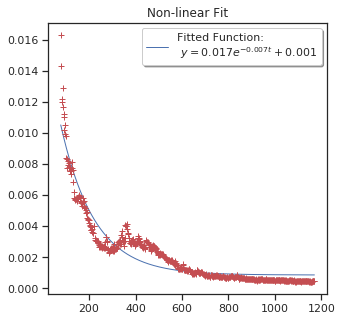

(0.01657877976383762, 0.006896846279006212)

In [24]:
import scipy as sp
import scipy.optimize

def plot_exp_fit(ax, t, noisy_y, fit_y, fit_parms):
    A, K, C = fit_parms
    
    ax.plot(t, fit_y, 'b-',
      label='Fitted Function:\n $y = %0.3f e^{%0.3f t} + %0.3f$' % (A, -K, C))
    ax.plot(t, noisy_y, 'r+')
    ax.legend(fancybox=True, shadow=True)

def func(t, a, b, c):
    return a * np.exp(-b * t) + c

def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(func, t, y, p0=[1, 1/100, 0])
    print(opt_parms)
    A, K, C = opt_parms
    return A, K, C

def find_exp_coeff(std_normalized_cells_response_curve):
    fig = plt.figure(figsize=(5, 5))
    ax1 = fig.add_subplot(1,1,1)

    std_argmax = np.argmax(std_normalized_cells_response_curve)

    y = std_normalized_cells_response_curve[std_argmax:]
    t = np.linspace(0, len(std_normalized_cells_response_curve), len(std_normalized_cells_response_curve)) * 2
    print(t[std_argmax])
    t=t[std_argmax:]

    # Non-linear Fit
    A, K, C = fit_exp_nonlinear(t, y)
    fit_y = func(t, A, K, C)
    plot_exp_fit(ax1, t, y, fit_y, (A, K, C))
    ax1.set_title('Non-linear Fit')

    plt.show()
    
    return A, K

find_exp_coeff(std_normalized_cells_response_curve)

In [25]:
a = [0,1,2,3]
np.mean(a[-3:])

2.0

In [26]:
from numpy import trapz

np.argmax(std_normalized_cells_response_curve)
std_normalized_cells_response_curve[21]
trapz(std_normalized_cells_response_curve[21:])

1.3048026732500362

In [27]:
std_normalized_cells_response_curve[21] * (len(std_normalized_cells_response_curve[21:]))

1.4067220213369447

In [28]:
std_normalized_cells_response_curve[0]

0.002731586750295464

## Divide the frames by the peaks

In [29]:
indexes_activation_time = [12, 485]

In [30]:
from module.helpers import divide_frames_by_indices

cells_response_curve_parts = divide_frames_by_indices(indexes, normalized_cells_response_curve)
raw_intensity_parts = divide_frames_by_indices(indexes, cells_intensity)

activation_time_curve_parts = divide_frames_by_indices(indexes_activation_time, normalized_cells_response_curve)

### Analysis of Activation Time

### Validate that the time series is stationary

In [31]:
from module.stathelper import validate_stationary
#import warnings

#warnings.filterwarnings("ignore")

p_value_results_adf, p_value_results_kpss  = validate_stationary(normalized_cells_response_curve)

/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-

/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-

/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-

/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-

/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-

/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-

/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-

/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/data/home/zamiram/anaconda3/lib/python3.7/site-

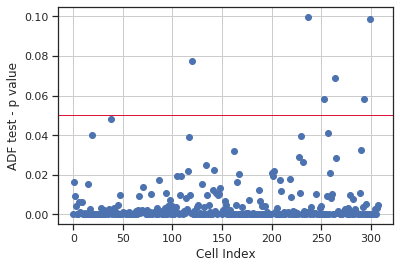

In [32]:
import matplotlib.pyplot as plt

plt.plot(p_value_results_adf, 'bo')

p_line = plt.axhline(0.05, color="crimson")

plt.xlabel('Cell Index')
plt.ylabel('ADF test - p value')
plt.grid(True)

plt.show()

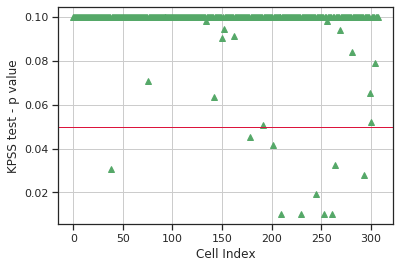

In [33]:
import matplotlib.pyplot as plt

plt.plot(p_value_results_kpss, 'g^')

p_line = plt.axhline(0.05, color="crimson")

plt.xlabel('Cell Index')
plt.ylabel('KPSS test - p value')
plt.grid(True)

plt.show()

### Filter out cells which have non-stationary response curve

In [34]:
kpss_filter = [True if p_value > 0.05 else False for p_value in p_value_results_kpss]
adf_filter = [True if p_value <= 0.05 else False for p_value in p_value_results_adf]

kpss_and_adf_filter = np.logical_and(kpss_filter, adf_filter)

np.sum(kpss_and_adf_filter) / float(len(kpss_and_adf_filter))

0.9577922077922078

## Voronoi diagram

### load centroids data

In [35]:
location_matlab_file = scipy.io.loadmat(location_filename)

centroids = location_matlab_file['centroids']

In [36]:
centroids.shape

(308, 2)

In [37]:
from scipy.spatial import ConvexHull
from module.topologicalhelper import area_of_rectangle, bounding_box
from module.topologicalhelper import split_to_small_bounding_boxes, filter_edges_in_bb_by_td, in_rect

hull = ConvexHull(centroids)

#print(hull.area)
rect_vert = bounding_box(centroids[hull.vertices])
#print(rect_vert)

#print(split_to_small_bounding_boxes(2, rect_vert))

print(centroids.shape[0])
area = area_of_rectangle(rect_vert[1][0]-rect_vert[0][0], rect_vert[2][1]-rect_vert[1][1])
area = area/(1000**2 * (0.656**2)) #convert to mm
print(1/area)
print(centroids.shape[0]*(1/(area)))

308
The Area of the Rectangle is 671948.9836801087
0.6404295719641536
197.25230816495932


In [38]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from module.topologicalhelper import voronoi_finite_polygons_2d

vor = Voronoi(centroids)

regions, vertices = voronoi_finite_polygons_2d(vor)

def plot_voronoi(regions, vertices, vor, points):
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    for region in regions:
        polygon = vertices[region]
        ax.fill(*zip(*polygon), alpha=0.7)
        
    centroids_valid = points[kpss_and_adf_filter]
    centroids_no_valid = points[~ kpss_and_adf_filter]

    
    ax.plot(centroids_valid[:,0], centroids_valid[:,1], 'ko')
    ax.plot(centroids_no_valid[:,0], centroids_no_valid[:,1], 'ko', color='r')
    ax.set_xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
    ax.set_ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
    
    #plt.savefig("voronoi.png", dpi=800)
    plt.show()

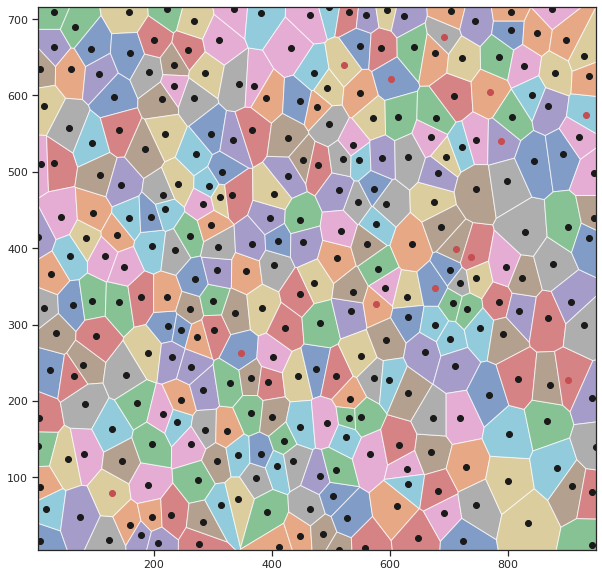

In [39]:
plot_voronoi(regions, vertices, vor, centroids)

In [40]:
##density

print(area_of_rectangle(rect_vert[1][0]-rect_vert[0][0], rect_vert[2][1]-rect_vert[1][1]) / centroids.shape[0])

The Area of the Rectangle is 671948.9836801087
2181.6525444159374


## Delaunay triangulation

In [41]:
from scipy.spatial import Delaunay
from module.topologicalhelper import find_neighbors

tri = Delaunay(centroids)

In [42]:
neighbor_indices = find_neighbors(tri, centroids)
#neighbor_indices[0]

## Divide the frames by the peaks

In [43]:
from module.helpers import divide_frames_by_indices

cells_response_curve_parts = divide_frames_by_indices(indexes, normalized_cells_response_curve)
raw_intensity_parts = divide_frames_by_indices(indexes, cells_intensity)

In [44]:
print(normalized_cells_response_curve.shape)
print(cells_response_curve_parts[0].shape)
print(len(cells_response_curve_parts))

(308, 585)
(308, 485)
1


## Serialization Stuff

In [45]:
from module.serializationhelper import save_object, load_object

In [73]:
analyze_result_df = load_object(base_path + 'analyze_result_df_5')

analyze_cell_stats = load_object(base_path + 'analyze_cell_stats')

distance_df = load_object(base_path + 'distance_df')

file is not exist path:./pickle/step_shear_data_2_mbar_2016_07_24_Exp_05_distance_df


## Analyze cross-correlation as a function of topolgical distance

In [74]:
from modulev2.analyze_cc import analyze_network_cc
import pandas as pd

    
def plot_cc_as_function_of_distance(base_path, neighbor_indices, cells_response_curve_parts):
    no_filter = np.full(len(neighbor_indices), True)
    
    analyze_result_cc_df_10 = load_object(base_path + 'analyze_result_cc_df_10')
    
    if analyze_result_cc_df_10 is None:
        analyze_result_cc_df_10 = analyze_network_cc(neighbor_indices, cells_response_curve_parts, no_filter, 10)

        save_object(analyze_result_cc_df_10, base_path + 'analyze_result_cc_df_10')

    analyze_cell_stats_cc_out = analyze_result_cc_df_10.groupby(['source', 'part', 'topological_distance']).agg('mean').unstack().loc[:, ['cross_correlation']].rename(columns={'cross_correlation':'cc_out'})
    analyze_cell_stats_cc_in = analyze_result_cc_df_10.groupby(['destination', 'part', 'topological_distance']).agg('mean').unstack().loc[:, ['cross_correlation']].rename(columns={'cross_correlation':'cc_in'})

    analyze_cell_stats_cc_df = pd.concat([analyze_cell_stats_cc_in, analyze_cell_stats_cc_out], axis=1, sort=False)
    analyze_cell_stats_cc_df = analyze_cell_stats_cc_df.fillna(0)
    
    fig = plt.figure(figsize=(15,8))
    ax = sns.pointplot(x=list(range(1, 11, 1)), y=analyze_cell_stats_cc_df.loc[:, ['cc_out']].mean().values)
    sns.set_style("whitegrid", {'axes.grid' : False, 'font_scale': 2})
    plt.title("Cross-Correlation as function of Length", fontsize=18)
    plt.ylabel("Coeffcient", fontsize=18)
    plt.xlabel("Topolgical Distance", fontsize=18)
    plt.show()

def calc_mean_cc(base_path, neighbor_indices, cells_response_curve_parts, distance=2):
    location_matlab_file = scipy.io.loadmat(location_filename)
    centroids = location_matlab_file['centroids']

    '''permuate centroids'''
    np.random.seed()
    perm_rows = np.random.permutation(range(0, centroids.shape[0]))
    centroids_perm = centroids[perm_rows, :]
    tri = Delaunay(centroids_perm)
    #print(centroids_perm)
    
    neighbor_indices = find_neighbors(tri, centroids_perm)
    
    no_filter = np.full(len(neighbor_indices), True)
    
    analyze_result_cc_df = None
    
    #analyze_result_cc_df = load_object(base_path + 'analyze_result_cc_df_' + str(distance))
    
    if analyze_result_cc_df is None:
        analyze_result_cc_df = analyze_network_cc(neighbor_indices, cells_response_curve_parts, no_filter, distance)
        
        #save_object(analyze_result_cc_df, base_path + 'analyze_result_cc_df_' + str(distance))
    
    analyze_cell_stats_cc_out = analyze_result_cc_df.groupby(['source', 'part']).agg('mean').unstack().loc[:, ['cross_correlation']].rename(columns={'cross_correlation':'cc_out'})
    analyze_cell_stats_cc_in = analyze_result_cc_df.groupby(['destination', 'part']).agg('mean').unstack().loc[:, ['cross_correlation']].rename(columns={'cross_correlation':'cc_in'})

    analyze_cell_stats_cc_df = pd.concat([analyze_cell_stats_cc_in, analyze_cell_stats_cc_out], axis=1, sort=False)
    analyze_cell_stats_cc_df = analyze_cell_stats_cc_df.fillna(0)
    
    return analyze_cell_stats_cc_df.loc[:, ['cc_out']].mean()
    

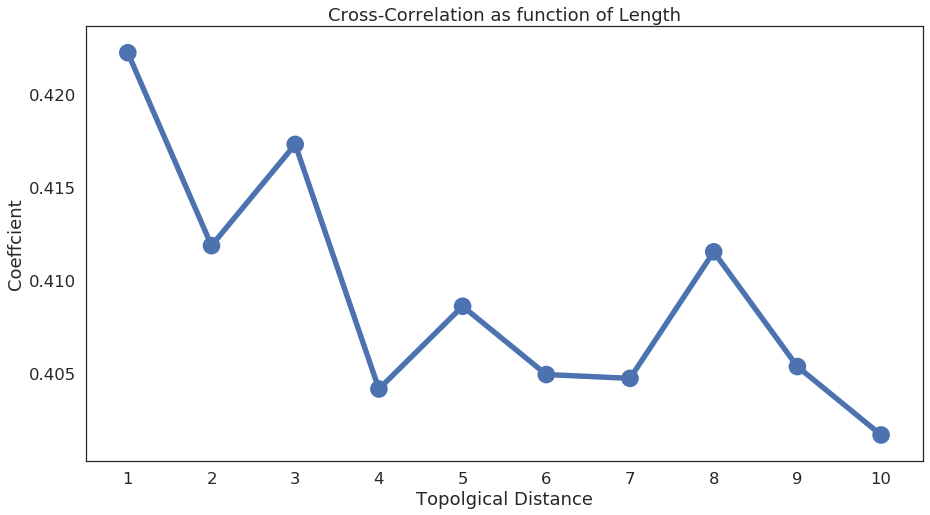

In [75]:
plot_cc_as_function_of_distance(base_path, neighbor_indices, cells_response_curve_parts)

In [76]:
'''
cc_sensetive_check = pd.DataFrame(columns=['d_1', 'd_2', 'd_3'])
for i in range(0, 20):
    print(i)
    cc_sensetive_check.loc[i, :] = [calc_mean_cc(base_path, neighbor_indices, cells_response_curve_parts, 1)[0], 
                                    calc_mean_cc(base_path, neighbor_indices, cells_response_curve_parts, 2)[0],
                                   calc_mean_cc(base_path, neighbor_indices, cells_response_curve_parts, 3)[0]]
'''

"\ncc_sensetive_check = pd.DataFrame(columns=['d_1', 'd_2', 'd_3'])\nfor i in range(0, 20):\n    print(i)\n    cc_sensetive_check.loc[i, :] = [calc_mean_cc(base_path, neighbor_indices, cells_response_curve_parts, 1)[0], \n                                    calc_mean_cc(base_path, neighbor_indices, cells_response_curve_parts, 2)[0],\n                                   calc_mean_cc(base_path, neighbor_indices, cells_response_curve_parts, 3)[0]]\n"

In [77]:
#cc_sensetive_check.var()

## Analyze GC

In [56]:
from modulev2.analyzetools import analyze_network

if analyze_result_df is None:
    analyze_result_df = analyze_network(neighbor_indices, cells_response_curve_parts, kpss_and_adf_filter, 5)
    
    analyze_result_df['total_neighbours'] = analyze_result_df.groupby(['source', 'part'])['destination'].transform(lambda x: x.count())
    analyze_result_df['critical_value'] = 0.05 / analyze_result_df['total_neighbours']
    analyze_result_df['significant'] = analyze_result_df['granger_causality_pvalue'] < analyze_result_df['critical_value']
    analyze_result_df['significant'] = analyze_result_df['significant'].astype(int)
    
    save_object(analyze_result_df, base_path + 'analyze_result_df_5')

In [52]:
# we want to mesaure how many pairs are matched in the direction of GC with the activation time
# for example: for i,j: a(i) < a(j) and GC(i->j) == is signficant
# for i,j: a(j) < a(i) and GC(j->i) == 

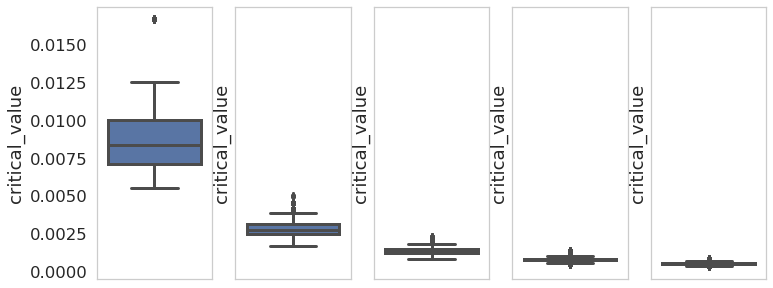

In [78]:
import scipy.stats as stats

fig, ax = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(12,5))

for upper_limit_td in range(1, 6):
    analyze_result_df_cut = analyze_result_df[analyze_result_df.topological_distance <= upper_limit_td].copy()
    
    analyze_result_df_cut['total_neighbours'] = analyze_result_df_cut.groupby(['source', 'part'])['destination'].transform(lambda x: x.count())
    analyze_result_df_cut['critical_value'] = 0.05 / analyze_result_df_cut['total_neighbours']
    analyze_result_df_cut['significant'] = analyze_result_df_cut['granger_causality_pvalue'] < analyze_result_df_cut['critical_value']
    analyze_result_df_cut['significant'] = analyze_result_df_cut['significant'].astype(int)

    sns.boxplot(ax=ax[upper_limit_td-1], 
                y=analyze_result_df_cut['critical_value'])

    #ax.set_ylim([-0.5, 0])

fig.savefig(base_path_artifacts + 'critical_value_vs_topological_distance' + '.eps', format='eps')
fig.savefig(base_path_artifacts + 'critical_value_vs_topological_distance' + '.png')
plt.show()

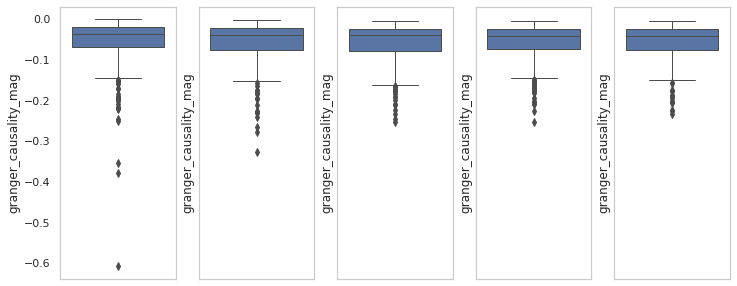

In [58]:
import scipy.stats as stats

fig, ax = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(12,5))

for upper_limit_td in range(1, 6):
    analyze_result_df_cut = analyze_result_df[analyze_result_df.topological_distance <= upper_limit_td].copy()
    
    analyze_result_df_cut['total_neighbours'] = analyze_result_df_cut.groupby(['source', 'part'])['destination'].transform(lambda x: x.count())
    analyze_result_df_cut['critical_value'] = 0.05 / analyze_result_df_cut['total_neighbours']
    analyze_result_df_cut['significant'] = analyze_result_df_cut['granger_causality_pvalue'] < analyze_result_df_cut['critical_value']
    analyze_result_df_cut['significant'] = analyze_result_df_cut['significant'].astype(int)

    sns.boxplot(ax=ax[upper_limit_td-1], 
                y=analyze_result_df_cut.groupby(['source', 'part']).agg('mean')['granger_causality_mag'])

    #ax.set_ylim([-0.5, 0])

plt.show()

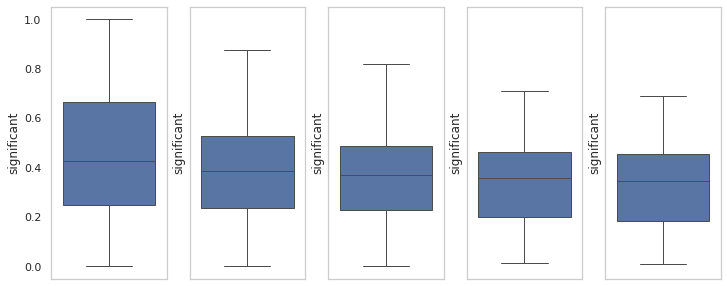

In [59]:
import scipy.stats as stats

fig, ax = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(12,5))

for upper_limit_td in range(1, 6):
    analyze_result_df_cut = analyze_result_df[analyze_result_df.topological_distance <= upper_limit_td].copy()
    
    analyze_result_df_cut['total_neighbours'] = analyze_result_df_cut.groupby(['source', 'part'])['destination'].transform(lambda x: x.count())
    analyze_result_df_cut['critical_value'] = 0.05 / analyze_result_df_cut['total_neighbours']
    analyze_result_df_cut['significant'] = analyze_result_df_cut['granger_causality_pvalue'] < analyze_result_df_cut['critical_value']
    analyze_result_df_cut['significant'] = analyze_result_df_cut['significant'].astype(int)

    sns.boxplot(ax=ax[upper_limit_td-1], 
                y=analyze_result_df_cut.groupby(['source', 'part']).agg('mean')['significant'])

    #ax.set_ylim([-0.5, 0])

plt.show()

In [60]:
analyze_result_df = analyze_result_df[analyze_result_df.topological_distance <= 2]

## Estrada’s index

In [63]:
def directed_estrada_index(analyze_result_df):
    sum = 0
    nodes_out_degree = analyze_result_df.groupby(['source', 'part']).agg('sum').unstack().loc[:, ['significant']].rename(columns={'significant':'gc_out'})
    nodes_in_degree = analyze_result_df.groupby(['destination', 'part']).agg('sum').unstack().loc[:, ['significant']].rename(columns={'significant':'gc_in'})
    assert nodes_out_degree.shape[0] == nodes_in_degree.shape[0]
    n = nodes_out_degree.shape[0]

    for ids, row in analyze_result_df.iterrows():
        if row['significant'] == 1:
            sum += (nodes_out_degree.loc[row['source']].sum()**(-0.5) - nodes_in_degree.loc[row['destination']].sum()**(-0.5))**2

    sum /= (n - 2*((n - 1)**0.5))

    return sum

In [64]:
def estrada_index(analyze_result_df):
    sum = 0
    nodes_degrees = pd.concat([analyze_result_df.groupby(['source', 'part']).agg('sum').unstack().loc[:, ['significant']].rename(columns={'significant':'gc_out'}),
                    analyze_result_df.groupby(['destination', 'part']).agg('sum').unstack().loc[:, ['significant']].rename(columns={'significant':'gc_in'})], axis=1)
    n = nodes_degrees.shape[0]

    for ids, row in analyze_result_df.iterrows():
        if row['significant'] == 1:
            sum += (nodes_degrees.loc[row['source']].sum()**(-0.5) - nodes_degrees.loc[row['destination']].sum()**(-0.5))**2

    sum /= (n - 2*((n - 1)**0.5))

    return sum

In [65]:
import random

def create_random_edges(gc_prob, length):
    list_of_random_0_1 = int(np.ceil(length*gc_prob))*'1' + int(np.ceil(length*(1-gc_prob)))*'0'
    list_of_random_0_1 = list(map(int, list_of_random_0_1))
    random.shuffle(list_of_random_0_1)
    return list_of_random_0_1

In [ ]:
def estrada_index_perm_test(analyze_result_df, n=100):
    perm_counter = 0    

    analyze_result_df_random = analyze_result_df.copy()

    gc_prob = analyze_result_df['significant'].sum()/analyze_result_df['significant'].count()

    estrada_idx_score = directed_estrada_index(analyze_result_df)

    for i in range(0, n):
        analyze_result_df_random['significant'] = create_random_edges(gc_prob, analyze_result_df.shape[0])    
        random_estrada_idx_score = directed_estrada_index(analyze_result_df_random)

        if estrada_idx_score < random_estrada_idx_score:
            perm_counter += 1

    return perm_counter/n

print(directed_estrada_index(analyze_result_df))
print(estrada_index(analyze_result_df))
estrada_index_perm_test(analyze_result_df)

0.14148159760786647
0.05456955519459494


### Null model vs Network

In [ ]:
import random
from scipy.stats import wasserstein_distance

# compare the un-normalized Tr/Re score between the null model and the real network
def analyze_cell_stats(analyze_result_df):
    cell_stats_gc_out = analyze_result_df.groupby(['source', 'part']).agg('mean').unstack().loc[:, ['significant']].rename(columns={'significant':'gc_out'})
    cell_stats_gc_in = analyze_result_df.groupby(['destination', 'part']).agg('mean').unstack().loc[:, ['significant']].rename(columns={'significant':'gc_in'})
    cell_stats = pd.concat([cell_stats_gc_in, cell_stats_gc_out], axis=1, sort=False)
    
    return cell_stats

def create_random_edges(gc_prob, length):
    list_of_random_0_1 = int(np.ceil(length*gc_prob))*'1' + int(np.ceil(length*(1-gc_prob)))*'0'
    list_of_random_0_1 = list(map(int, list_of_random_0_1))
    random.shuffle(list_of_random_0_1)
    return list_of_random_0_1

def mean_array(arr):
    result = np.zeros(len(arr) - 1)
    for min_idx in range(0, len(arr) - 1, 1):
        result[min_idx] = np.mean(arr[min_idx:min_idx + 2])
    
    return result

def calc_distance_between_grid(pix, piy):
    X, Y = np.meshgrid(pix, piy)
    # Compute pariwise distances between points on 2D grid so we know
    # how to score the Wasserstein distance
    coords = np.array([X.flatten(), Y.flatten()]).T    
    coordsSqr = np.sum(coords**2, 1)
    M = coordsSqr[:, None] + coordsSqr[None, :] - 2*coords.dot(coords.T)
    M[M < 0] = 0
    M = np.sqrt(M)
    
    return M

def calc_homogeneity_score(cell_stats, cell_stats_random, number_of_bins=20):
    concat_x = np.concatenate((cell_stats[0], cell_stats_random[0]))
    concat_y = np.concatenate((cell_stats[1], cell_stats_random[1]))
    xy_min = [min(concat_x), min(concat_y)]
    xy_max = [max(concat_x), max(concat_y)]
    range = [[xy_min[0], xy_max[0]], [xy_min[1], xy_max[1]]]
    
    H_i, xedges_i, yedges_i = np.histogram2d(cell_stats[0, :], 
                                             cell_stats[1, :], 
                                             bins=number_of_bins, 
                                             range=range, density=True)
    
    H_i_random, xedges_i_random, yedges_i_random = np.histogram2d(cell_stats_random[0, :], 
                                             cell_stats_random[1, :], 
                                             bins=number_of_bins, 
                                             range=range, density=True)
    
    square_size = (xedges_i[1]-xedges_i[0]) * (yedges_i[2]-yedges_i[1])

    distance_matrix = calc_distance_between_grid(mean_array(xedges_i), mean_array(yedges_i))
    
    return wasserstein_distance(H_i.flatten() * square_size, H_i_random.flatten() * square_size, distance_matrix, distance_matrix)        

gc_prob = analyze_result_df['significant'].sum()/analyze_result_df['significant'].count()
analyze_result_df_random = analyze_result_df.copy()

emd_bins_scores = pd.DataFrame(columns=['n_bins', 'median', 'mean', 'std'])

for n_bins in range(10, 60, 10):
    results = []
    for i in range(0, 100):
        analyze_result_df_random['significant'] = create_random_edges(gc_prob, analyze_result_df.shape[0])

        cell_stats = analyze_cell_stats(analyze_result_df)
        cell_stats_random = analyze_cell_stats(analyze_result_df_random)

        #calc distance between dist
        results.append(calc_homogeneity_score(cell_stats.values.transpose(), cell_stats_random.values.transpose(), n_bins))

    print(f'n_bins: {n_bins}, mean: {np.median(results)}, var: {np.std(results)}')
    
    emd_bins_scores.loc[emd_bins_scores.shape[0]] = [n_bins, np.median(results), np.mean(results), np.std(results)]

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = sns.pointplot(x=list(map(int, emd_bins_scores['n_bins'])), y=emd_bins_scores['median'])
sns.set_style("whitegrid", {'axes.grid' : False, 'font_scale': 2})
#plt.title("Cross-Correlation as function of Length", fontsize=18)
#plt.ylabel("Coeffcient", fontsize=18)
plt.xlabel("#Bins", fontsize=18)
plt.show()

In [ ]:
np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(2, 5)

In [ ]:
perm_counter = 0

analyze_result_df_random_2 = analyze_result_df.copy()

for i in range(0, 100):
    analyze_result_df_random['significant'] = create_random_edges(gc_prob, analyze_result_df.shape[0])
    analyze_result_df_random_2['significant'] = create_random_edges(gc_prob, analyze_result_df.shape[0])

    cell_stats = analyze_cell_stats(analyze_result_df)
    cell_stats_random = analyze_cell_stats(analyze_result_df_random)
    cell_stats_random_2 = analyze_cell_stats(analyze_result_df_random_2)
    
    #calc distance between dist
    random_to_real = calc_homogeneity_score(cell_stats.values.transpose(), cell_stats_random.values.transpose(), 30)
    random_to_random = calc_homogeneity_score(cell_stats_random_2.values.transpose(), cell_stats_random.values.transpose(), 30)
    
    if random_to_real < random_to_random:
        perm_counter += 1

perm_counter/100

In [ ]:
sns.distplot(cell_stats_random['gc_in'])

In [ ]:
sns.distplot(cell_stats['gc_in'])

In [ ]:
import scipy.stats as stats

x_feature_name = analyze_result_df.groupby(['source', 'part']).agg('mean').loc[:, ['granger_causality_mag']]['granger_causality_mag'].values
y_feature_name = analyze_result_df.groupby(['source', 'part']).agg('mean').loc[:, ['significant']]['significant'].values

print(stats.pearsonr(x=x_feature_name, y=y_feature_name))

x_feature_name = analyze_result_df.groupby(['destination', 'part']).agg('mean').loc[:, ['granger_causality_mag']]['granger_causality_mag'].values
y_feature_name = analyze_result_df.groupby(['destination', 'part']).agg('mean').loc[:, ['significant']]['significant'].values

print(stats.pearsonr(x=x_feature_name, y=y_feature_name))


## Revision Figure 2
Replacing all transmission and receiver score

In [61]:
def get_node_degrees(df: pd.DataFrame):
    df_degree_sum = pd.concat([df.groupby(['source', 'part']).agg('sum').unstack().loc[:, ['significant']].rename(columns={'significant':'out_degree'}),
                               df.groupby(['destination', 'part']).agg('sum').unstack().loc[:, ['significant']].rename(columns={'significant':'in_degree'})], axis=1)

    return df_degree_sum

get_node_degrees(analyze_result_df)

,out_degree,in_degree
part,0.0,0.0
0.0,8,4
1.0,0,2
2.0,14,3
3.0,2,4
4.0,11,15
...,...,...
303.0,2,8
304.0,3,14
305.0,3,7


In [62]:
def get_out_degree_func(nodes_degrees: pd.DataFrame):
    return nodes_degrees['out_degree']

def get_in_degree_func(nodes_degrees: pd.DataFrame):
    return nodes_degrees['in_degree']

def get_total_degree_func(nodes_degrees: pd.DataFrame):
    return nodes_degrees['in_degree'] + nodes_degrees['out_degree']

In [84]:
import random
import pylab
from matplotlib.pyplot import pause
import networkx as nx
from matplotlib import animation, rc
from IPython.display import HTML
from plots_analyzetools import plot_voronoi, plot_colormap
import matplotlib as mpl

def create_color_mapper_degree(analyze_cell_degrees, score_func, cmap):
    minima = 0
    maxima = 20
    
    number_of_parts = len(analyze_cell_degrees.columns.levels[1])
    
    for part in range(0, number_of_parts):        
        maxima = np.maximum(maxima, np.max(score_func(analyze_cell_degrees)[part]))
    #    minima = np.minimum(minima, np.min(score_func(analyze_cell_degrees)[part]))
    
    norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    
    return mapper

def make_movie(analyze_cell_degrees, score_func, metric_name, base_path_artifacts, colormap=mpl.cm.Blues):
    # Build plot
    fig, axs = plt.subplots(figsize=(12,10), nrows=1, ncols=1)
    
    score_for_parts = score_func(analyze_cell_degrees)
    mapper = create_color_mapper_degree(analyze_cell_degrees, score_func, cmap=colormap)
    plot_colormap(mapper)
    plt.suptitle('Cells Degrees are Heterogeneous')
    plt.subplots_adjust(top=0.80)

    def update(part):        
        data = score_for_parts[part]
        #data = apply_custom_filter(data, kpss_and_adf_filter)
        #custom_filter = np.greater(data, np.zeros((len(data))))
        custom_filter = data != 0
        
        custom_filter = custom_filter.reindex(list(range(int(np.min(np.hstack(regions))),
                                                         int(np.max(np.hstack(regions)))+1)), fill_value=False)
        
        plot_voronoi(axs, mapper, regions, vertices, vor, centroids, 
                         data,
                         custom_filter)
        
        fig.savefig(base_path_artifacts + '_' + metric_name + " Cycle %d"%(part) +'.eps', format='eps')

        # Scale plot ax
        axs.set_title(metric_name + " Cycle %d"%(part), fontweight="bold")
        axs.set_xticks([])
        axs.set_yticks([])
        
        #plot_correlation(axs[0], part)

    anim = animation.FuncAnimation(fig, update, frames=len(cells_response_curve_parts), interval=500, repeat=True)
    
    anim.save(base_path_artifacts + metric_name + '_cells_memory.mp4')

    return HTML(anim.to_html5_video())

def plot_degrees_movies(analyze_cell_degrees: pd.DataFrame, base_path_artifacts):
    sns.set(style='white', font_scale = 2, rc={"lines.linewidth": 4})

    out_degrees_movie = make_movie(analyze_cell_degrees, get_out_degree_func, 'Out-Degree', base_path_artifacts, colormap=mpl.cm.Blues)

    in_degrees_movie = make_movie(analyze_cell_degrees, get_in_degree_func, 'In-Degree', base_path_artifacts, colormap=mpl.cm.Reds)
    
    total_degrees_movie = make_movie(analyze_cell_degrees, get_total_degree_func, 'Degree', base_path_artifacts, colormap=mpl.cm.Greens)

    sns.set()

In [86]:
base_path_artifacts

'./artifacts/step_shear_data_2_mbar_2016_07_24_Exp_05_'

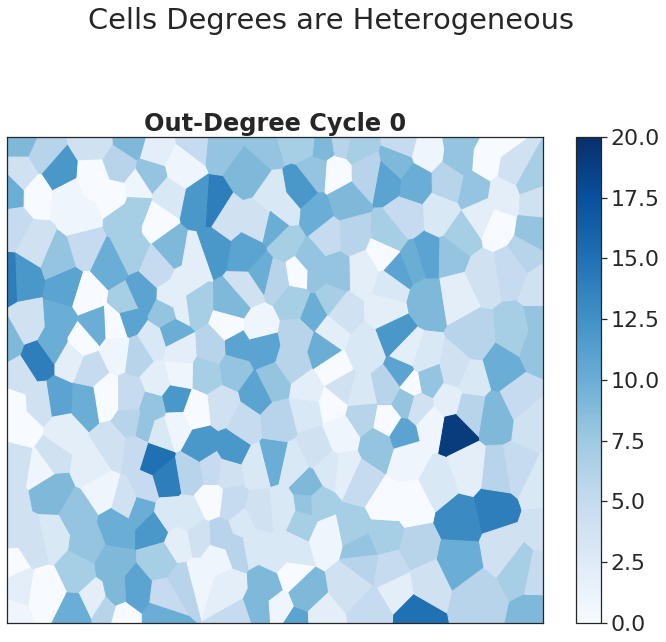

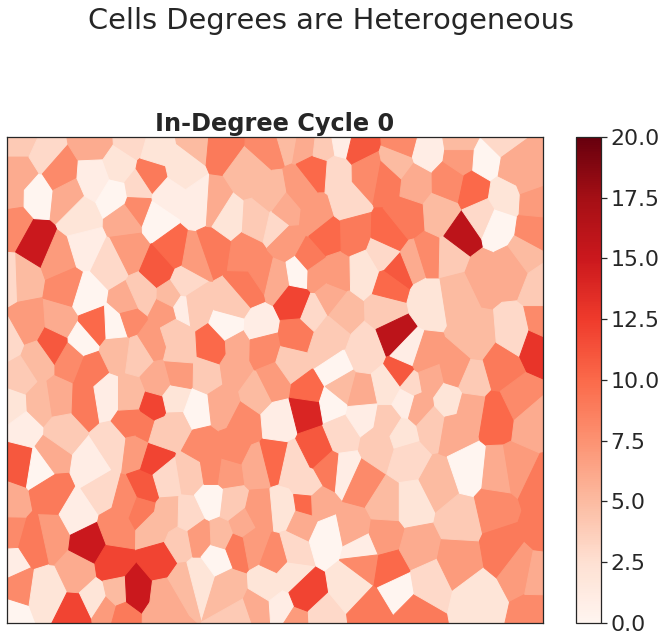

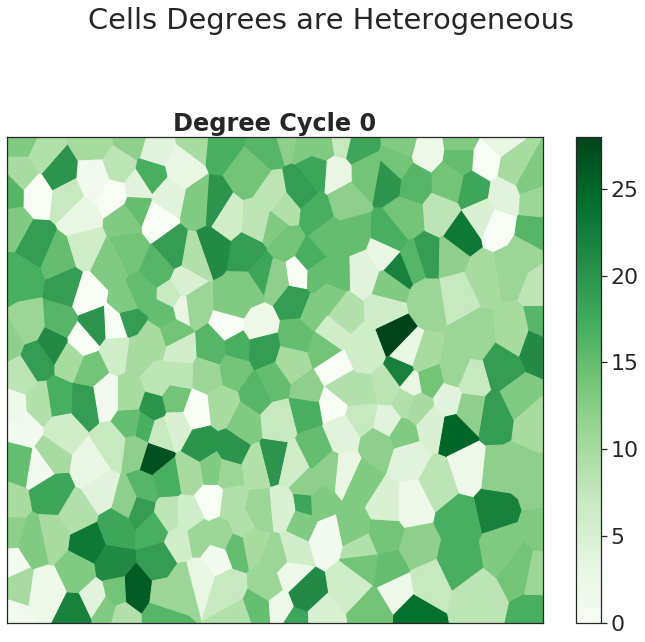

In [85]:
plot_degrees_movies(get_node_degrees(analyze_result_df), base_path_artifacts)

In [64]:
from scipy.stats import pearsonr

def plot_scatter(df, x_feature_name, y_feature_name, prefix='', 
                save=False, xlim=None, ylim=None, xlog=False, ylog=False):
    
    import scipy.stats as stats

    sns.set(style='white', font_scale = 1.5, rc={"lines.linewidth": 3})
    
    df_temp = df.copy(True)
    
    if xlog:
        df_temp['log('+x_feature_name+')'] = np.log(df_temp[x_feature_name])
        x_feature_name = 'log('+x_feature_name+')'
    
    if ylog:
        df_temp['log('+y_feature_name+')'] = np.log(df_temp[y_feature_name])
        y_feature_name = 'log('+y_feature_name+')'

    fig, ax = plt.subplots(figsize=(6,6))
    ax = sns.scatterplot(ax=ax, x=x_feature_name, y=y_feature_name, data=df_temp)
    
    if (ylim is not None):
        ax.set(ylim=ylim)
    
    if (xlim is not None):
        ax.set(xlim=xlim)

    #x_ticks_range = np.arange(0.0, max(df[x_feature_name]), step=0.0015)
    #y_ticks_range = np.arange(0.0, max(df[y_feature_name]), step=0.1)

    #ax.set(xlim=(0.0, 0.003), ylim=(0.0, 0.3), xticks=x_ticks_range, yticks=y_ticks_range)
    #ax.set(xlim=(0.0), ylim=(0.0))
    ax.set(xlabel=x_feature_name, ylabel=y_feature_name)

    data_correlation = stats.pearsonr(x=df_temp[x_feature_name], 
                                      y=df_temp[y_feature_name])

    ax.annotate("n={}, coefficient = {:.4f}, p = {:.4f}".format(len(df_temp),
                data_correlation[0], data_correlation[1]), 
                xy=(.1, .2), xycoords=ax.transAxes, fontsize=11)

    #plt.plot(ticks_range, ticks_range, 'r--')

    plt.tight_layout(pad=0.4, w_pad=2, h_pad=1.0)

    plt.show()
    
    if save:
        fig.savefig(base_path_artifacts + '_' + prefix + '_' + x_feature_name + '_vs_' + y_feature_name + '.eps', format='eps')
        fig.savefig(base_path_artifacts + '_' + prefix + '_' + x_feature_name + '_vs_' + y_feature_name + '.png')
    plt.clf()
    plt.close(fig)

### Association between # neighbors and degrees

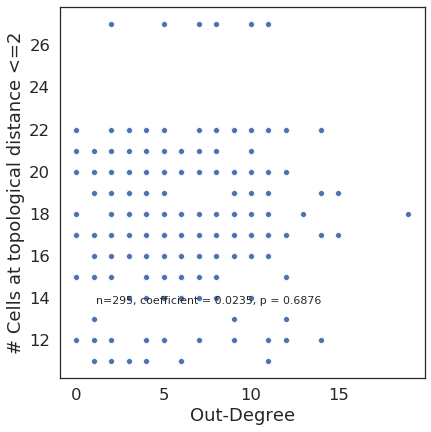

<Figure size 432x288 with 0 Axes>

In [65]:
from scipy.stats import pearsonr
    
test_df = pd.DataFrame(columns=['# Cells at topological distance <=2', 'Out-Degree'])
analyze_result_temp_test = analyze_result_df.groupby(['source', 'part']) \
                            .agg('sum').unstack().loc[:, ['significant']]
analyze_result_temp_test['Out-Degree'] = analyze_result_temp_test['significant']
test_df['Out-Degree'] = analyze_result_temp_test['Out-Degree']
test_df['# Cells at topological distance <=2'] = analyze_result_df.groupby(['source', 'part'])['destination'].transform(lambda x: x.count())


plot_scatter(df=test_df, x_feature_name='Out-Degree', y_feature_name='# Cells at topological distance <=2', save=True)

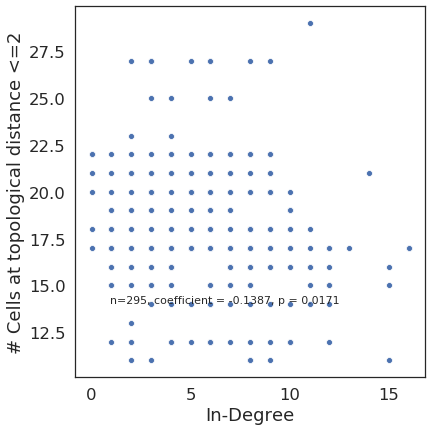

<Figure size 432x288 with 0 Axes>

In [66]:
from scipy.stats import pearsonr
    
test_df = pd.DataFrame(columns=['# Cells at topological distance <=2', 'In-Degree'])
analyze_result_temp_test = analyze_result_df.groupby(['destination', 'part']) \
                            .agg('sum').unstack().loc[:, ['significant']]
analyze_result_temp_test['In-Degree'] = analyze_result_temp_test['significant']
test_df['In-Degree'] = analyze_result_temp_test['In-Degree']
test_df['# Cells at topological distance <=2'] = analyze_result_df.groupby(['destination', 'part'])['source'].transform(lambda x: x.count())

plot_scatter(df=test_df, x_feature_name='In-Degree', y_feature_name='# Cells at topological distance <=2', save=True)

In [68]:
(analyze_result_df.groupby(['destination', 'part']).agg('sum').unstack().loc[:, ['significant']] + 
                            analyze_result_df.groupby(['source', 'part']).agg('sum').unstack().loc[:, ['significant']])

,significant
part,0.0
destination,
0.0,12
1.0,2
2.0,17
3.0,6
4.0,26
...,...
303.0,10
304.0,17


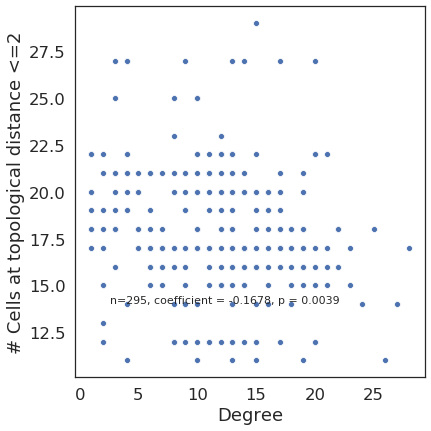

<Figure size 432x288 with 0 Axes>

In [72]:
from scipy.stats import pearsonr
    
test_df = pd.DataFrame(columns=['# Cells at topological distance <=2', 'In-Degree'])
analyze_result_temp_test = (analyze_result_df.groupby(['destination', 'part']).agg('sum').unstack().loc[:, ['significant']] + 
                            analyze_result_df.groupby(['source', 'part']).agg('sum').unstack().loc[:, ['significant']])
analyze_result_temp_test['Degree'] = analyze_result_temp_test['significant']
test_df['Degree'] = analyze_result_temp_test['Degree']
test_df['# Cells at topological distance <=2'] = analyze_result_df.groupby(['destination', 'part'])['source'].transform(lambda x: x.count())

plot_scatter(df=test_df, x_feature_name='Degree', y_feature_name='# Cells at topological distance <=2', save=True)

### Association between # neighbors and followership/leadership

In [ ]:
from scipy.stats import pearsonr
    
test_df = pd.DataFrame(columns=['Total Neighbours', 'Transmission Score'])
analyze_result_temp_test = analyze_result_df.groupby(['source', 'part']) \
                            .agg('mean').unstack().loc[:, ['significant']]
analyze_result_temp_test['Transmission Score'] = analyze_result_temp_test['significant']
test_df['Transmission Score'] = analyze_result_temp_test['Transmission Score']
test_df['Total Neighbours'] = analyze_result_df.groupby(['source', 'part'])['destination'].transform(lambda x: x.count())


plot_scatter(df=test_df, x_feature_name='Transmission Score', y_feature_name='Total Neighbours', save=True)

In [ ]:
np.unique(analyze_result_df.groupby(['destination', 'part']).agg('mean').unstack()['total_neighbours'])

In [ ]:
from scipy.stats import pearsonr
    
test_df = pd.DataFrame(columns=['Total Neighbours', 'Receiver Score'])
analyze_result_temp_test = analyze_result_df.groupby(['destination', 'part']) \
                            .agg('mean').unstack().loc[:, ['significant']]
analyze_result_temp_test['Reciver Score'] = analyze_result_temp_test['significant']
test_df['Receiver Score'] = analyze_result_temp_test['Reciver Score']
test_df['Total Neighbours'] = analyze_result_df.groupby(['destination', 'part'])['source'].transform(lambda x: x.count())

plot_scatter(df=test_df, x_feature_name='Receiver Score', y_feature_name='Total Neighbours', save=True)

In [ ]:
from bisect import bisect_left

activation_time_feature_scores = None
analyze_cell_stats = None

def apply_custom_filter(ts, custom_filter):
    if custom_filter is not None:
        ts = ts[custom_filter]
        
    return ts

def find_activation(cells_intensity, threshold=0.10):
    from scipy.signal import find_peaks
    violations = 0
    
    intensity_activation_frame = np.zeros((cells_intensity.shape[0]))
    for i in range(cells_intensity.shape[0]):
        min_value = np.min(cells_intensity[i])
        max_value = np.max(cells_intensity[i])
        cell_value_threshold = cells_intensity[i][0] + threshold*(max_value-cells_intensity[i][0])
        
        activation_time_arrival = [idx for idx,value in enumerate(cells_intensity[i]) if value>cell_value_threshold]
        
        if len(activation_time_arrival) < 1:
            violations += 1
            intensity_activation_frame[i] = 0
        else:
            intensity_activation_frame[i] = activation_time_arrival[0]

    return intensity_activation_frame, violations

def calc_activation_time_for_parts(activation_time_curve_parts, number_of_parts, threshold):
    violations = {}
    activation_time_scores = {}
    for part in range(0, number_of_parts):
        activation_time_scores[part], violations[part] = find_activation(activation_time_curve_parts[part], threshold=threshold)
    
    print(violations)
    
    return activation_time_scores

if analyze_cell_stats is None:
    analyze_cell_stats_gc_out = analyze_result_df.groupby(['source', 'part']).agg('mean').unstack().loc[:, ['significant']].rename(columns={'significant':'gc_out'})
    analyze_cell_stats_gc_in = analyze_result_df.groupby(['destination', 'part']).agg('mean').unstack().loc[:, ['significant']].rename(columns={'significant':'gc_in'})
    analyze_cell_stats = pd.concat([analyze_cell_stats_gc_in, analyze_cell_stats_gc_out], axis=1, sort=False)
    analyze_cell_stats = analyze_cell_stats.fillna(0)
    
    activation_time_feature_scores = calc_activation_time_for_parts(activation_time_curve_parts, len(cells_response_curve_parts), threshold=0.30)
    
    for part in activation_time_feature_scores:
        analyze_cell_stats['activation_time', part] = apply_custom_filter(activation_time_feature_scores[part], kpss_and_adf_filter)
        
    
    save_object(analyze_cell_stats, base_path + 'analyze_cell_stats')

In [ ]:
sns.distplot(analyze_cell_stats.activation_time, hist=False)

In [ ]:
import scipy.stats as stats

print('receiver score vs activation time: ' + str(stats.pearsonr(analyze_cell_stats.gc_in[0], analyze_cell_stats.activation_time[0])))
print('transmission socre vs activation time: ' + str(stats.pearsonr(analyze_cell_stats.gc_out[0], analyze_cell_stats.activation_time[0])))

In [ ]:
sns.lineplot(y=cells_response_curve_parts[0][3], x=range(0, len(cells_response_curve_parts[0][3])))
max_value_temp = np.max(cells_response_curve_parts[0][3])
print('max: ' + str(max_value_temp))
cell_value_threshold_temp = cells_response_curve_parts[0][3][0] + 0.30*(max_value_temp-cells_response_curve_parts[0][3][0])
print('th: ' + str(cell_value_threshold_temp))

# Activation Time vs GC (pairswise analysis)

In [ ]:
type(analyze_cell_stats.loc[307.0].activation_time.iloc[0])

In [ ]:
def calc_tanimoto_score(neighbor_indices, analyze_cell_stats, kpss_and_adf_filter):
    dict_pairs = {}

    at_gc_matrix = np.zeros(shape=(3,4))
    only_activation = 0
    only_gc = 0
    both_activation_gc = 0

    for source, neighbors in neighbor_indices.items():
        if not kpss_and_adf_filter[source]:
            continue

        for destination in neighbors:
            if not kpss_and_adf_filter[destination]:
                continue

            if str(source) + ' ' + str(destination) in dict_pairs:
                continue

            if str(destination) + ' ' + str(source) in dict_pairs:
                continue

            dict_pairs[str(source) + ' ' + str(destination)] = 1
            dict_pairs[str(destination) + ' ' + str(source)] = 1

            row = analyze_result_df[(analyze_result_df.source == source) & (analyze_result_df.destination == destination)]
            row_opp = analyze_result_df[(analyze_result_df.source == destination) & (analyze_result_df.destination == source)]

            source = row.source.values[0]
            destination = row.destination.values[0]
            right_direction = analyze_cell_stats.loc[source].activation_time.iloc[0]< analyze_cell_stats.loc[destination].activation_time.iloc[0]
            left_direction = analyze_cell_stats.loc[destination].activation_time.iloc[0] < analyze_cell_stats.loc[source].activation_time.iloc[0]

            if right_direction:
                only_activation +=1

            if left_direction:
                only_activation +=1
            
            if (not left_direction) & (not right_direction):
                only_activation +=1

            #right activation time direction
            if right_direction & (row.significant.iloc[0] == 1) & (row_opp.significant.iloc[0] == 0):
                both_activation_gc += 1
                at_gc_matrix[0, 0] += 1            
            elif right_direction & (row_opp.significant.iloc[0] == 1) & (row.significant.iloc[0] == 0):
                at_gc_matrix[0, 1] += 1        
            elif right_direction & (row.significant.iloc[0] == 1) & (row_opp.significant.iloc[0] == 1):
                at_gc_matrix[0, 2] += 1        
            elif right_direction & (row_opp.significant.iloc[0] == 0) & (row.significant.iloc[0] == 0):
                at_gc_matrix[0, 3] += 1
                
            #left activation time direction
            if left_direction & (row.significant.iloc[0] == 1) & (row_opp.significant.iloc[0] == 0):
                at_gc_matrix[1, 0] += 1            
            elif left_direction & (row_opp.significant.iloc[0] == 1) & (row.significant.iloc[0] == 0):
                both_activation_gc += 1
                at_gc_matrix[1, 1] += 1
            elif left_direction & (row.significant.iloc[0] == 1) & (row_opp.significant.iloc[0] == 1):
                at_gc_matrix[1, 2] += 1
            elif left_direction & (row_opp.significant.iloc[0] == 0) & (row.significant.iloc[0] == 0):
                at_gc_matrix[1, 3] += 1

            #no activation time direction
            if (not left_direction) & (not right_direction) & (row.significant.iloc[0] == 1) & (row_opp.significant.iloc[0] == 0):
                at_gc_matrix[2, 0] += 1
            elif (not left_direction)  & (not right_direction) & (row_opp.significant.iloc[0] == 1) & (row.significant.iloc[0] == 0):
                at_gc_matrix[2, 1] += 1
            elif (not left_direction)  & (not right_direction) & (row.significant.iloc[0] == 1) & (row_opp.significant.iloc[0] == 1):
                at_gc_matrix[2, 2] += 1
            elif (not left_direction) & (not right_direction) & (row_opp.significant.iloc[0] == 0) & (row.significant.iloc[0] == 0):
                both_activation_gc += 1
                at_gc_matrix[2, 3] += 1
    
    return (both_activation_gc) / (only_activation + only_gc - both_activation_gc), at_gc_matrix

In [ ]:
from tqdm.notebook import trange, tqdm
from multiprocessing import Pool

def bootstrap_test_private(analyze_cell_stats, neighbor_indices, kpss_and_adf_filter):
    np.random.seed()
    analyze_cell_stats_copy = analyze_cell_stats.copy(deep=True)
    analyze_cell_stats_copy.activation_time = analyze_cell_stats_copy.sample(replace=True, frac=1).activation_time.values

    tanimoto_score_star, _ = calc_tanimoto_score(neighbor_indices, analyze_cell_stats_copy, kpss_and_adf_filter)
    return tanimoto_score_star

def bootstrap_test(neighbor_indices, analyze_cell_stats, kpss_and_adf_filter):
    tanimoto_score, at_gc_matrix = calc_tanimoto_score(neighbor_indices, analyze_cell_stats, kpss_and_adf_filter)
    count = 0
    results_lists = []
    n = 3000 #10 times of m = the size of vector
    
    with Pool(50) as pool:
        results = [pool.apply_async(bootstrap_test_private, 
                                    (analyze_cell_stats, neighbor_indices, kpss_and_adf_filter,)) for i in range(0, n)]

        for p_result in tqdm(results, total=n):
            results_lists.append(p_result.get())
            if p_result.get() >= tanimoto_score:                
                count += 1
    
    p_value = count/n
    
    #plot dist figure
    fig = plt.figure(figsize=(15, 15))
    sns.distplot(results_lists)
    plt.show()
    plt.clf()
    plt.close(fig)
    
    return tanimoto_score, at_gc_matrix, p_value

tanimoto_experiment_result = pd.DataFrame(columns=['threshold', 'tanimoto_score', 'p_value'])
tanimoto_experiment_index = 0

for threshold in range(15, 36, 10):
    print(threshold)
    
    threshold = threshold / 100
    
    activation_time_feature_scores = calc_activation_time_for_parts(activation_time_curve_parts, len(cells_response_curve_parts), threshold=threshold)

    for part in activation_time_feature_scores:
        analyze_cell_stats['activation_time', part] = apply_custom_filter(activation_time_feature_scores[part], kpss_and_adf_filter)

    tanimoto_score, matrix, p_value = bootstrap_test(neighbor_indices, analyze_cell_stats, kpss_and_adf_filter)
    print(tanimoto_score, matrix, p_value)
    
    tanimoto_experiment_result.loc[tanimoto_experiment_index] = [threshold, tanimoto_score, p_value]
    tanimoto_experiment_index += 1

tanimoto_experiment_result

In [ ]:
matrix

In [ ]:
pd.DataFrame(data=matrix, columns=['GC(i->j)', 'GC(j->i)', 'GC(j<->i)' ,'None'], index=['a(i) < a(j)', 'a(j) < a(i)', 'a(i) == a(j)'])

In [ ]:
at_gc_matrix = numpy.zeros(shape=(2,3))

for index, row in analyze_result_df.iterrows():
    source = row.source
    destination = row.destination
    significant = row.significant
    
    if analyze_cell_stats[row.source] < analyze_cell_stats[row.destination] and row.significant == 1:
        at_gc_matrix[0, 0] += 1
    elif analyze_cell_stats[row.source] >= analyze_cell_stats[row.destination] and row.significant == 1:
        at_gc_matrix[1, 0] += 1
    
    break
    

In [ ]:
analyze_cell_stats

In [ ]:
len(analyze_cell_stats.columns.levels[1])

## Video of network cell function state over time

In [104]:
def gc_out_score_func(analyze_cell_stats):
    return analyze_cell_stats['gc_out']

def gc_in_score_func(analyze_cell_stats):
    return analyze_cell_stats['gc_in']

def gc_log_ratio_score_func(analyze_cell_stats):
    return np.log2(analyze_cell_stats['gc_out']/analyze_cell_stats['gc_in'])

def gc_ratio_score_func(analyze_cell_stats):
    return analyze_cell_stats['gc_out']/analyze_cell_stats['gc_in']

In [115]:
import random
import pylab
from matplotlib.pyplot import pause
import networkx as nx
from matplotlib import animation, rc
from IPython.display import HTML
from plots_analyzetools import plot_voronoi, plot_colormap
import matplotlib as mpl

def create_color_mapper(analyze_cell_stats, score_func, cmap):
    minima = 20
    maxima = -20
    
    number_of_parts = len(analyze_cell_stats.columns.levels[1])
    
    for part in range(0, number_of_parts):        
        data = score_func(analyze_cell_stats)[part]
        data = data[(data != np.inf) & (data != -np.inf)]
        
        maxima = np.maximum(maxima, np.max(data))
        minima = np.minimum(minima, np.min(data))
        print(f'max: {maxima}, min: {minima}')
    
    norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    
    return mapper

def plot_correlation(ax, part):
    sns.set(style='white', font_scale = 2, rc={"lines.linewidth": 4})
    sns.set_palette('Set1')
    
    part_t = 0
    
    if part > 1:
        part_t = part - 1

    sns.lineplot(data=gc_sign_cc_score.transpose().drop(['activation_time', 'centrality'], axis=1)[:part_t],
                markers=True, dashes=False,
                legend=False, 
                ax=ax)
    ax.text(0.6, 0.1,'P-value=[0, 0.019]', fontsize=20, transform=ax.transAxes) #add text
    ax.set(xticks=range(0, 12))
    ax.set_ylim([0, 0.35])
    ax.set_xlim([0, 11])
    ax.set_title("Cross-Correlation(Cycle %d,  Cycle %d)"%(part_t, part_t + 1), fontweight="bold")

    ax.legend(loc='upper left', labels=['Transmission', 'Receiver'])

def make_movie(analyze_cell_stats, score_func, metric_name, base_path_artifacts, colormap=mpl.cm.Blues):
    # Build plot
    fig, axs = plt.subplots(figsize=(12,10), nrows=1, ncols=1)
    
    score_for_parts = score_func(analyze_cell_stats)
    mapper = create_color_mapper(analyze_cell_stats, score_func, cmap=colormap)
    plot_colormap(mapper)
    plt.suptitle('Cells Maintain Memory of their Functional\n in Cell-Cell Communication')
    plt.subplots_adjust(top=0.80)

    def update(part):        
        data = score_for_parts[part]
        #data = apply_custom_filter(data, kpss_and_adf_filter)
        #custom_filter = np.greater(data, np.zeros((len(data))))
        custom_filter = data != 0
        
        custom_filter = custom_filter.reindex(list(range(int(np.min(np.hstack(regions))),
                                                         int(np.max(np.hstack(regions)))+1)), fill_value=False)
        
        plot_voronoi(axs, mapper, regions, vertices, vor, centroids, 
                         data,
                         custom_filter)
        
        fig.savefig(base_path_artifacts + '_' + metric_name + '.eps', format='eps')
        fig.savefig(base_path_artifacts + '_' + metric_name + '.png')

        # Scale plot ax
        axs.set_title(metric_name, fontweight="bold")
        axs.set_xticks([])
        axs.set_yticks([])
        
        #plot_correlation(axs[0], part)

    anim = animation.FuncAnimation(fig, update, frames=len(cells_response_curve_parts), interval=500, repeat=True)
    
    anim.save(base_path_artifacts + metric_name + '_cells_memory.mp4')

    return HTML(anim.to_html5_video())

def plot_leadership_followership_movies(analyze_cell_stats, base_path_artifacts):
    sns.set(style='white', font_scale = 2, rc={"lines.linewidth": 4})

    #leadership_movie = make_movie(analyze_cell_stats, gc_out_score_func, 'Transmission Score', base_path_artifacts, colormap=mpl.cm.Blues)

    #followership_movie = make_movie(analyze_cell_stats, gc_in_score_func, 'Receiver Score', base_path_artifacts, colormap=mpl.cm.Reds)
    
    log_ratio_movie = make_movie(analyze_cell_stats, gc_log_ratio_score_func, 'Log Ratio of Tr Score and Re Score', base_path_artifacts, colormap=mpl.cm.RdBu)
    
    ratio_movie = make_movie(analyze_cell_stats, gc_ratio_score_func, 'Ratio of Tr Score and Re Score', base_path_artifacts, colormap=mpl.cm.rainbow)

    sns.set()

In [117]:
base_path_artifacts

'./artifacts/step_shear_data_2_mbar_2016_07_24_Exp_05_'

max: 2.700439718141092, min: -3.1699250014423126
max: 6.500000000000001, min: 0.0


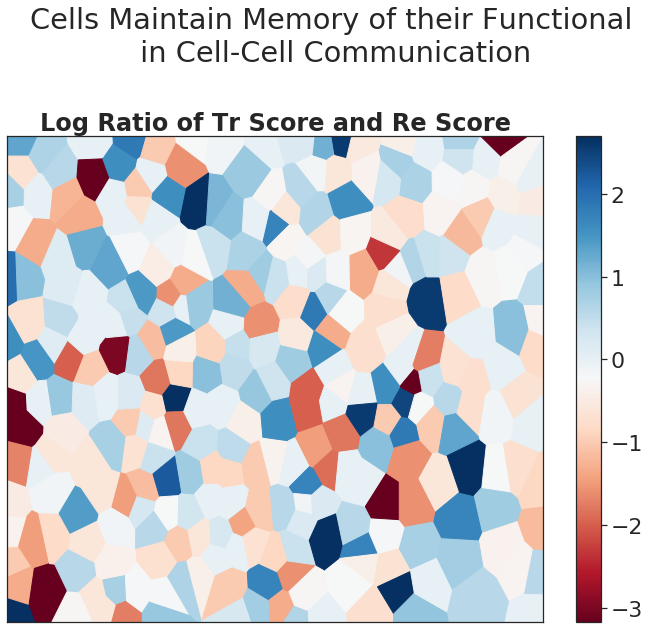

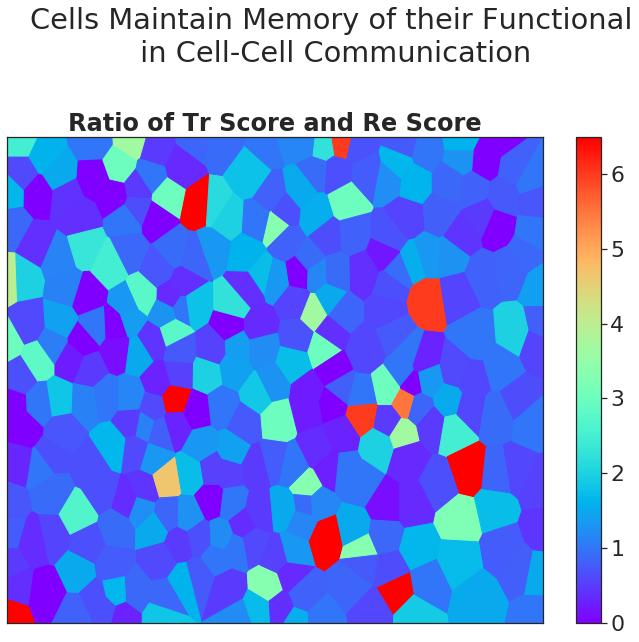

In [116]:
plot_leadership_followership_movies(analyze_cell_stats, base_path_artifacts)

## Anslysis of cell state

# Clustring

### Compute the distance dataframe for each pair of cells

In [173]:
analyze_cell_stats_flat = cell_stats.stack()

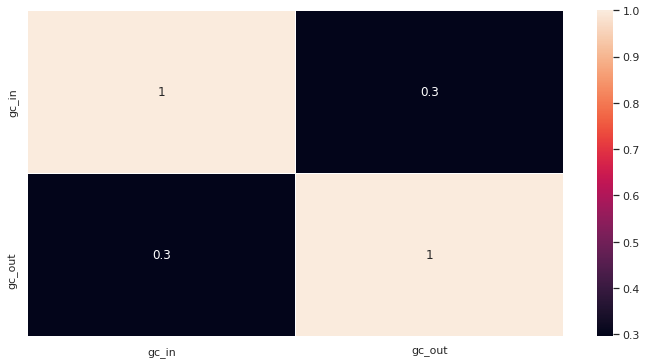

In [174]:
import seaborn as sns

cor = analyze_cell_stats_flat.loc[pd.IndexSlice[:, len(indexes)-2], :].corr(method='pearson') #Calculate the correlation of the above variables

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(cor, annot=True, linewidths=.5)
sns.set()
plt.show()

In [53]:
con_analyze_cell_stats_flat = analyze_cell_stats_flat[['gc_in','gc_out']].values.copy(order='C')

In [54]:
from mpl_toolkits.mplot3d import Axes3D

def plot_data(dpc, con_analyze_cell_stats_flat):
    fig = plt.figure(figsize=(15, 5))
    ax = []    
    ax.append(fig.add_subplot(1, 3, 1))
    ax.append(fig.add_subplot(1, 3, 2))
    ax.append(fig.add_subplot(1, 3, 3))
    ax[0].scatter(con_analyze_cell_stats_flat[:, 0], con_analyze_cell_stats_flat[:, 1], s=40)
    ax[0].scatter(con_analyze_cell_stats_flat[dpc.clusters, 0], con_analyze_cell_stats_flat[dpc.clusters, 1],  s=50, c="red")
    ax[1].scatter(con_analyze_cell_stats_flat[:, 0], con_analyze_cell_stats_flat[:, 1], s=40, c=dpc.density)
    ax[2].scatter(con_analyze_cell_stats_flat[:, 0], con_analyze_cell_stats_flat[:, 1], s=40, c=dpc.membership, cmap=mpl.cm.cool)
    for _ax in ax:
        #_ax.plot([-mux, -mux], [-1.5 * muy, 1.5 * muy], '--', linewidth=2, color="red")
        #_ax.plot([mux, mux], [-1.5 * muy, 1.5 * muy], '--', linewidth=2, color="red")
        #_ax.plot([-1.5 * mux,  1.5 * mux], [-muy, -muy], '--', linewidth=2, color="red")
        #_ax.plot([-1.5 * mux,  1.5 * mux], [muy, muy], '--', linewidth=2, color="red")
        _ax.set_xlabel(r"gc in-degree", fontsize=15)
        _ax.set_ylabel(r"gc out-degree", fontsize=15)    
        _ax.tick_params(labelsize=10)
        #_ax.set_xlim([-7, 7])
        #_ax.set_ylim([-7, 7])
        _ax.set_aspect('equal')
    fig.tight_layout()

## Manual

In [175]:
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

def standard_df(df):
    pipe_norm = make_pipeline(StandardScaler())
    pipe_norm.fit(df)
    transformed_norm = pipe_norm.transform(df)
    
    return transformed_norm, pipe_norm

def transle_role(role):
    if (role == 0):
        return 'Hub'
    elif (role == 1):
        return 'Individual'
    elif (role == 2):
        return 'Follower'
    elif (role == 3):
        return 'Leader'
    else:
        return 'Normal'

def get_role(row, threshold):    
    if (row[0] >= threshold and row[1] >= threshold):
        return 0
    elif (row[0] <= -threshold and row[1] <= -threshold):
        return 1
    elif (row[0] >= threshold and row[1] < threshold):
        return 2
    elif (row[0] < threshold and row[1] >= threshold):
        return 3
    else:
        return 4


transformed_norm_df, pipe_norm_df = standard_df(analyze_cell_stats_flat[['gc_in','gc_out']].loc[pd.IndexSlice[:, :], :])

analyze_cell_stats_flat['Manual_0.5'] = np.apply_along_axis(lambda row: get_role(row, 0.5), 1, transformed_norm_df)
analyze_cell_stats_flat['Manual_1.0'] = np.apply_along_axis(lambda row: get_role(row, 1), 1, transformed_norm_df)
analyze_cell_stats_flat['Manual_1.5'] = np.apply_along_axis(lambda row: get_role(row, 1.5), 1, transformed_norm_df)
analyze_cell_stats_flat['Manual_2.0'] = np.apply_along_axis(lambda row: get_role(row, 2), 1, transformed_norm_df)
analyze_cell_stats_flat['Manual_2.5'] = np.apply_along_axis(lambda row: get_role(row, 2.5), 1, transformed_norm_df)

In [176]:
analyze_cell_stats_flat[['gc_in','gc_out', 'activation_time']].describe()

KeyError: "['activation_time'] not in index"

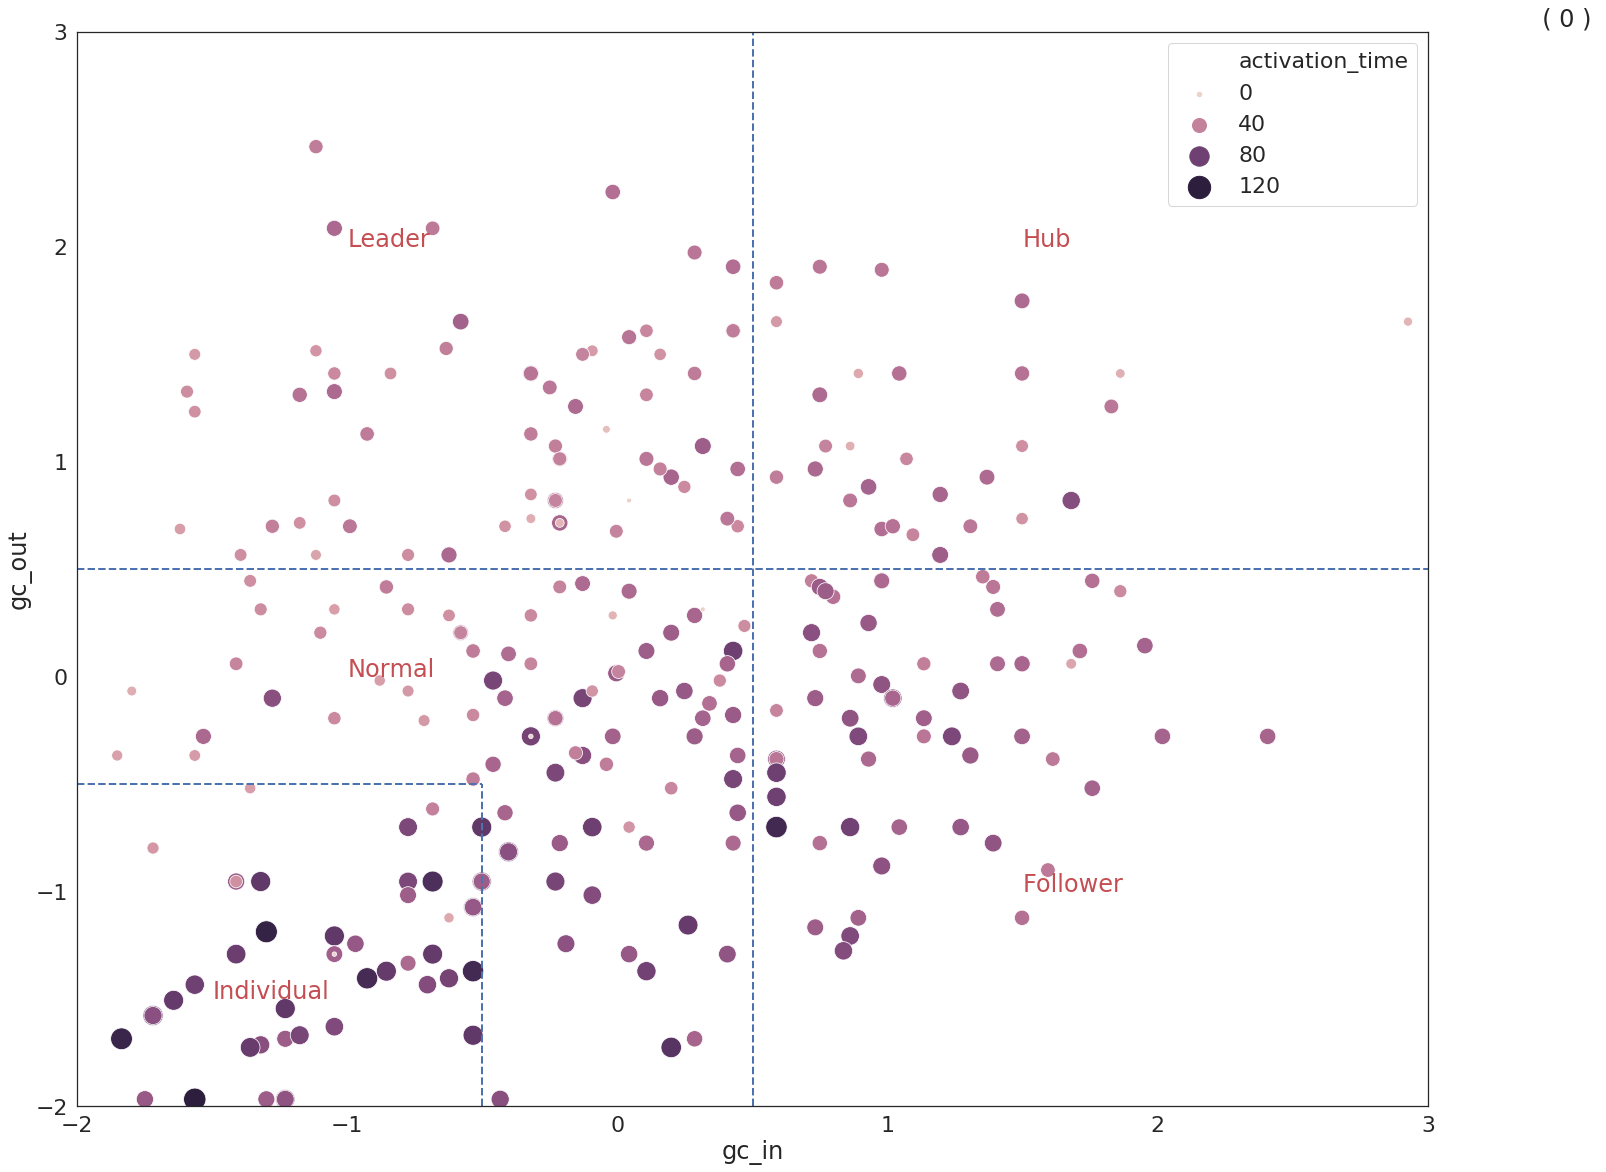

<Figure size 432x288 with 0 Axes>

In [195]:
from module.plothelpers import SeabornFig2Grid as sfg
import matplotlib.gridspec as gridspec
import math

def print_2d_dist(base_path_artifacts, cut, df):
    idx = pd.IndexSlice
    sns.set(style='white', font_scale = 2, rc={"lines.linewidth": 1})
    cycles = len(df.index.levels[1])
    
    axis_lim = [-2, 3]
    
    cycle_div_factor = 4
    
    for cycle_index in range(0, cycles, cycle_div_factor):
        fig, ax = plt.subplots(figsize=(20, 16))
        
        g = sns.scatterplot(x="gc_in", y="gc_out", 
                       data=df.loc[idx[:, [cycle_index, cycle_index]], ['gc_in', 'gc_out','activation_time']], 
                       hue='activation_time', legend="brief", size='activation_time', sizes=(20, 500))
                        #.set_axis_labels("receiver score", "transmission score")
                        #.plot_joint(plt.scatter, c="y", s=30, linewidth=1, marker="+")\
                
        #outpathc = g.get_children()[3] 

        #plt.colorbar(mappable=outpathc)
        
        g.plot([cut,cut], axis_lim, 'b--', linewidth = 2)
        g.plot(axis_lim ,[cut,cut], 'b--', linewidth = 2)
        g.plot([-cut,-cut], [axis_lim[0],-cut], 'b--', linewidth = 2)
        g.plot([axis_lim[0],-cut] ,[-cut,-cut], 'b--', linewidth = 2)
        g.text(-1,2,'Leader', color="r")
        g.text(1.5,-1,'Follower', color="r")
        g.text(1.5,2,'Hub', color="r")
        g.text(-1.5,-1.5,'Individual', color="r")
        g.text(-1,0,'Normal', color="r")
        
        plt.tight_layout(pad=0.4, w_pad=2, h_pad=1.0)
        ax.set_xlim(axis_lim)
        ax.set_ylim(axis_lim)
        
        plt.title("  ( " +  str(cycle_index) + " ) ", x=1.10)
        
        #fig.savefig(base_path_artifacts + '2d_activation_time_dist_over_time_' + str(cycle_index) + '.png')
        #plt.savefig(base_path_artifacts + '2d_activation_time_dist_over_time_' + str(cycle_index) + '.eps', format='eps')  
        
        plt.show()
        plt.clf()
        plt.close(fig)    
    
        #sfg(g, fig, gs[(int)(cycle_index / cycle_div_factor)])
    
    #gs.tight_layout(fig, pad=0.4, w_pad=2, h_pad=1.0)
    #gs.update(top=6)
    
    #fig.savefig(base_path_artifacts + '2d_roles_dist_over_time.png')
    #plt.savefig(base_path_artifacts + '2d_roles_dist_over_time.eps', format='eps')  

print_2d_dist(base_path_artifacts, 0.5, 
             pd.DataFrame(np.hstack((transformed_norm_df, analyze_cell_stats_flat['activation_time'].values.reshape(-1 , 1))), index=analyze_cell_stats_flat.index, columns=analyze_cell_stats_flat[['gc_in','gc_out', 'activation_time']].columns))

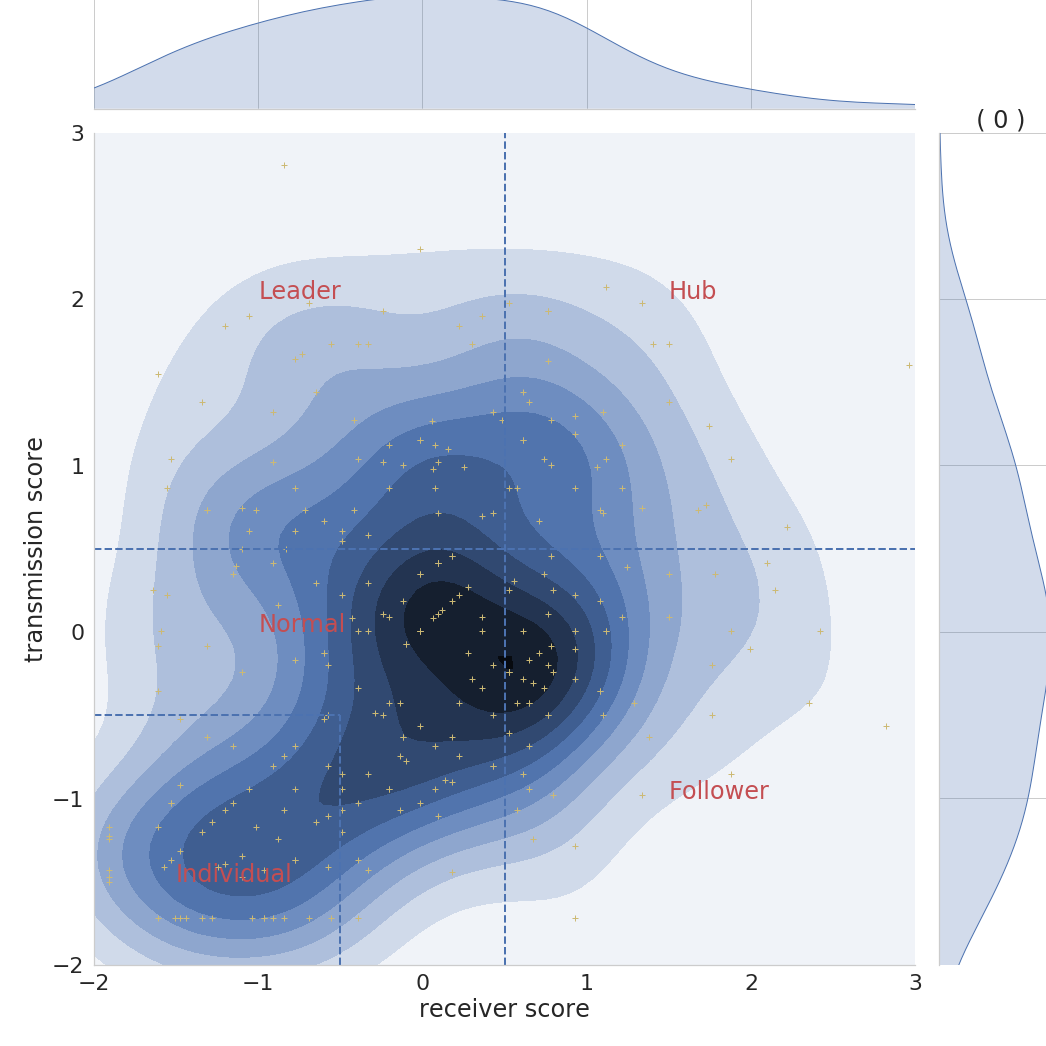

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

In [177]:
from module.plothelpers import SeabornFig2Grid as sfg
import matplotlib.gridspec as gridspec
import math

idx = pd.IndexSlice

def print_2d_dist(df):    
    sns.set(style='whitegrid', font_scale = 2, rc={"lines.linewidth": 1})
    cycles = len(df.index.levels[1])
    
    axis_lim = [-2, 3]
    
    cycle_div_factor = 1
    
    fig = plt.figure(figsize=(15, 15))
    
    gs = gridspec.GridSpec(1, 1)
    
    cut = 0.5
    
    for cycle_index in range(0, cycles, cycle_div_factor):        
        g = sns.jointplot(x="gc_in", y="gc_out", 
                          data=df.loc[idx[:, [cycle_index, cycle_index]], ['gc_in', 'gc_out']], kind="kde",
                         xlim=axis_lim,
                         ylim=axis_lim, cbar=True, shade_lowest=True)\
                    .plot_joint(plt.scatter, c="y", s=30, linewidth=1, marker="+")\
                    .set_axis_labels("receiver score", "transmission score")
        
        g.ax_joint.plot([cut,cut], axis_lim, 'b--', linewidth = 2)
        g.ax_joint.plot(axis_lim ,[cut,cut], 'b--', linewidth = 2)
        g.ax_joint.plot([-cut,-cut], [axis_lim[0],-cut], 'b--', linewidth = 2)
        g.ax_joint.plot([axis_lim[0],-cut] ,[-cut,-cut], 'b--', linewidth = 2)
        g.ax_joint.text(-1,2,'Leader', color="r")
        g.ax_joint.text(1.5,-1,'Follower', color="r")
        g.ax_joint.text(1.5,2,'Hub', color="r")
        g.ax_joint.text(-1.5,-1.5,'Individual', color="r")
        g.ax_joint.text(-1,0,'Normal', color="r")
        
        plt.title("  ( " +  str(cycle_index) + " ) ", x=1.10)
    
        sfg(g, fig, gs[(int)(cycle_index)])
    
    gs.tight_layout(fig, pad=1, w_pad=2, h_pad=2)

    plt.show()
    
    fig.savefig(base_path_artifacts + "2d_dist" +'.eps', format='eps')
    
    plt.clf()
    plt.close(fig)

print_2d_dist(pd.DataFrame(transformed_norm_df, index=analyze_cell_stats_flat.index, columns=analyze_cell_stats_flat[['gc_in','gc_out']].columns))

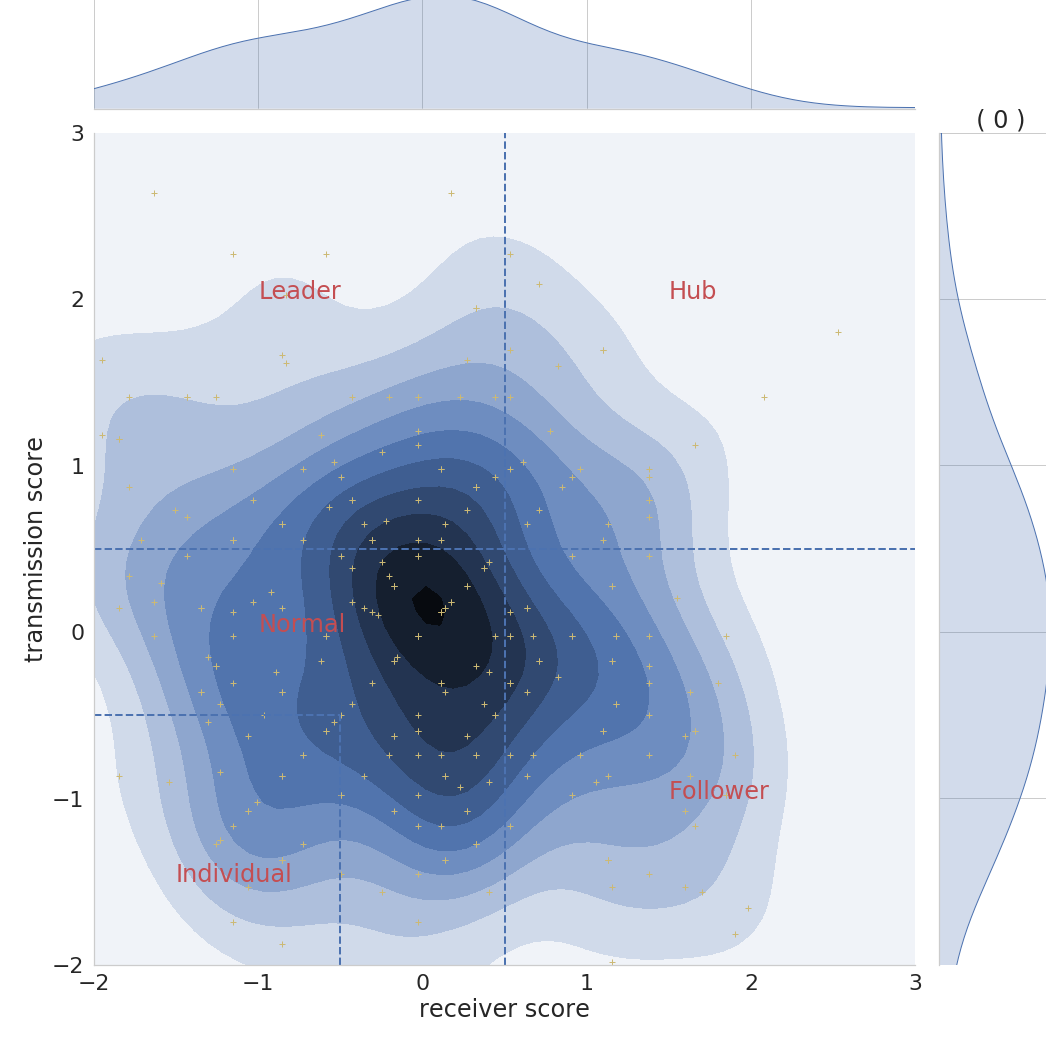

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

In [178]:
cell_stats_random_flat = cell_stats_random.stack()

transformed_norm_df_random, pipe_norm_df_random = standard_df(cell_stats_random_flat[['gc_in','gc_out']].loc[pd.IndexSlice[:, :], :])

cell_stats_random_flat['Manual_0.5'] = np.apply_along_axis(lambda row: get_role(row, 0.5), 1, transformed_norm_df_random)

print_2d_dist(pd.DataFrame(transformed_norm_df_random, index=cell_stats_random_flat.index, columns=cell_stats_random_flat[['gc_in','gc_out']].columns))

## Switch cells responses with hub roles with with arbitrary cells and mesaure the cells roles

In [58]:
import numba
print(numba.__version__)

0.48.0


In [69]:
def get_optimal_lag_exper(p_src_index, src_neighbor_indices, normalized_cells_response_curve):
    from statsmodels.tsa.api import VAR
    
    #get the src neighbors    
    number_of_points = len(src_neighbor_indices)
    
    optimal_lag_vector = dict()
    
    for p_dst_index in src_neighbor_indices:
        src_dst_data = None
        try:
            src_dst_data = normalized_cells_response_curve[[p_src_index, p_dst_index], :]
            src_dst_data = np.transpose(src_dst_data)            
            model = VAR(src_dst_data)        
            maxlags=None

            lag_order_results = model.select_order(maxlags=maxlags)        

            lags = [lag_order_results.aic, lag_order_results.bic, lag_order_results.fpe, lag_order_results.hqic]        

            min_i = np.argmin(lags)        

            model = model.fit(maxlags=lags[min_i], ic=None)

            p_value_whiteness = model.test_whiteness(nlags=lags[min_i]).pvalue

            if p_value_whiteness == float('nan') or p_value_whiteness < 0.05:
                raise ValueError('found autocorrelation in residuals.')

                #i = models[min_i].k_ar + 1
                #while i < 12 * (models[min_i].nobs/100.)**(1./4):                
                #    result_auto_co = model._estimate_var(i,  trend='c')
                #    if result_auto_co.test_whiteness(nlags=i).pvalue > 0.05:                    
                #        break
                #    i += 1            

                #    print 'error order:' + str(models[min_i].k_ar)                
                #    print 'found correlation ' + str(i)

            optimal_lag_vector[p_dst_index] = lags[min_i]
        except:
            print('src index: ' + str(p_src_index) + ' dst index: ' + str(p_dst_index))
            if src_dst_data is not None:
                print(src_dst_data)
            raise
        
    return optimal_lag_vector

def check_raw_gc(src_indice, dst_indice, intensity_table, lag):
    from module.stathelper import grangercausalitytests_mem
    gc_magnitude = 0
    p_value = 0
    gc_magnitude, p_value = grangercausalitytests_mem(src_indice, dst_indice, intensity_table, maxlag=lag, difference=False)

    if (gc_magnitude is None) or (p_value is None):       
        gc_magnitude = 0
        p_value = 0
        
    return gc_magnitude, p_value

def analyze_network_perm(analyze_result_df_perm, cells_indices, pipe_norm_df):
    analyze_result_df_perm['total_neighbours'] = analyze_result_df_perm.groupby(['source', 'part'])['destination'].transform(lambda x: x.count())
    analyze_result_df_perm['critical_value'] = 0.05 / analyze_result_df_perm['total_neighbours']
    analyze_result_df_perm['significant'] = analyze_result_df_perm['granger_causality_pvalue'] < analyze_result_df_perm['critical_value']
    analyze_result_df_perm['significant'] = analyze_result_df_perm['significant'].astype(int)

    analyze_cell_stats_gc_out_perm = analyze_result_df_perm.groupby(['source', 'part']).agg('mean').unstack().loc[:, ['significant']].rename(columns={'significant':'gc_out'})
    analyze_cell_stats_gc_in_perm = analyze_result_df_perm.groupby(['destination', 'part']).agg('mean').unstack().loc[:, ['significant']].rename(columns={'significant':'gc_in'})    

    analyze_cell_stats_perm = pd.concat([analyze_cell_stats_gc_in_perm, analyze_cell_stats_gc_out_perm], axis=1, sort=False)
    analyze_cell_stats_perm = analyze_cell_stats_perm.fillna(0)
    
    analyze_cell_stats_flat_perm = analyze_cell_stats_perm.stack()
    
    transformed_norm_df_perm = pipe_norm_df.transform(analyze_cell_stats_flat_perm)
    
    analyze_cell_stats_flat_perm['Manual_0.5'] = np.apply_along_axis(lambda row: get_role(row, 0.5), 1, transformed_norm_df_perm)
    
    state_matrix_perm = analyze_cell_stats_flat_perm.unstack()['Manual_' + str(0.5)].transpose()
    unique_elements, counts_elements = np.unique(state_matrix_perm.loc[:, cells_indices].values.flatten(), return_counts=True)
    normalize_counts_elements = counts_elements/sum(counts_elements)
    
    hub_counts_index = np.where(unique_elements == 0)
    indivdual_counts_index = np.where(unique_elements == 1)
    
    return counts_elements[hub_counts_index] / counts_elements[indivdual_counts_index]

def get_hub_ind_count_ratio(state_matrix, cells_indices):
    unique_elements, counts_elements = np.unique(state_matrix.loc[:, :].values.flatten(), return_counts=True)
    normalize_counts_elements = counts_elements/sum(counts_elements)
    hub_counts_index = np.where(unique_elements == 0)
    indivdual_counts_index = np.where(unique_elements == 1)
    return counts_elements[hub_counts_index] / counts_elements[indivdual_counts_index]

def get_hub_ind_count_ratio_perm(cells_indices, tp_indices_1, tp_indices_2, kpss_and_adf_filter, pipe_norm_df):
    #collect for each hub/individual cells all neighbours in degree of 1 and 2 to avoid collisions
    cells_neighbours = dict()

    for cell_order_i in range(0, len(cells_indices)):
        cells_neighbours[cell_order_i] = tp_indices_1[cells_indices[cell_order_i]] + tp_indices_2[cells_indices[cell_order_i]]

    ## permuate neibhours
    get_new_location_indices = np.zeros((len(cells_indices)), dtype=np.int32)

    #find for each hub cell his new location
    for cell_order_i in range(0, len(cells_indices)):
        indices_pool = list(filter(lambda x: (x not in cells_neighbours[cell_order_i]) and (x not in np.where(kpss_and_adf_filter == False)[0]), range(0, centroids.shape[0])))
        rand_indice = np.random.randint(len(indices_pool))
        get_new_location_indices[cell_order_i] = indices_pool[rand_indice]
        
    print('cells_indices: ' + str(cells_indices))
    print('get_new_location_indices: ' + str(get_new_location_indices))
    
    #all cells
    all_cells = set(get_new_location_indices).union(set(cells_indices))
    print(all_cells)

    index = 0
    result_df = pd.DataFrame(columns=['source', 'destination', 'part', 'topological_distance', 'optimal_lag', 'granger_causality_mag', 'granger_causality_pvalue'])
    
    print('calculate role')
    #calculate role
    for cell_old_new_location in zip(get_new_location_indices, cells_indices):
        #from module.stathelper import get_optimal_lag

        cell_new_neighbors_indices = tp_indices_1[cell_old_new_location[0]]

        #get for each neighbor the optimal lag
        print('enter')
        cell_new_neighbors_optimal_lag = get_optimal_lag_exper(cell_old_new_location[1], cell_new_neighbors_indices, cells_response_curve_parts[0])
        print('exit')

        for dst_indice in cell_new_neighbors_indices:        
            if not kpss_and_adf_filter[dst_indice]:
                continue

            #check out-degree causality
            granger_causality_mag, granger_causality_pvalue = check_raw_gc(cell_old_new_location[1], dst_indice, cells_response_curve_parts[0], cell_new_neighbors_optimal_lag[dst_indice])
            result_df.loc[index] = [cell_old_new_location[1], dst_indice, 0, 1, cell_new_neighbors_optimal_lag[dst_indice], granger_causality_mag, granger_causality_pvalue]
            index +=1

            #check in-degree causality
            granger_causality_mag, granger_causality_pvalue = check_raw_gc(dst_indice, cell_old_new_location[1], cells_response_curve_parts[0], cell_new_neighbors_optimal_lag[dst_indice])
            result_df.loc[index] = [dst_indice, cell_old_new_location[1], 0, 1, cell_new_neighbors_optimal_lag[dst_indice], granger_causality_mag, granger_causality_pvalue]
            index +=1

        cell_new_neighbors_indices = tp_indices_2[cell_old_new_location[0]]

        #get for each neighbor the optimal lag
        cell_new_neighbors_optimal_lag = get_optimal_lag_exper(cell_old_new_location[1], cell_new_neighbors_indices, cells_response_curve_parts[0])

        for dst_indice in cell_new_neighbors_indices:
            if not kpss_and_adf_filter[dst_indice]:
                continue

            #check out-degree causality
            granger_causality_mag, granger_causality_pvalue = check_raw_gc(cell_old_new_location[1], dst_indice, cells_response_curve_parts[0], cell_new_neighbors_optimal_lag[dst_indice])                
            result_df.loc[index] = [cell_old_new_location[1], dst_indice, 0, 2, cell_new_neighbors_optimal_lag[dst_indice], granger_causality_mag, granger_causality_pvalue]
            index +=1

            #check in-degree causality
            granger_causality_mag, granger_causality_pvalue = check_raw_gc(dst_indice, cell_old_new_location[1], cells_response_curve_parts[0], cell_new_neighbors_optimal_lag[dst_indice])
            result_df.loc[index] = [dst_indice, cell_old_new_location[1], 0, 2, cell_new_neighbors_optimal_lag[dst_indice], granger_causality_mag, granger_causality_pvalue]
            index +=1
            
    print('calculate original neighbours with switched cells')
    #calculate original neighbours with switched cells
    for cell_old_new_location in zip(cells_indices, get_new_location_indices):
        #from module.stathelper import get_optimal_lag

        cell_new_neighbors_indices = tp_indices_1[cell_old_new_location[0]]

        #get for each neighbor the optimal lag
        cell_new_neighbors_optimal_lag = get_optimal_lag_exper(cell_old_new_location[1], cell_new_neighbors_indices, cells_response_curve_parts[0])

        for dst_indice in cell_new_neighbors_indices:        
            if not kpss_and_adf_filter[dst_indice]:
                continue

            #check out-degree causality
            granger_causality_mag, granger_causality_pvalue = check_raw_gc(cell_old_new_location[1], dst_indice, cells_response_curve_parts[0], cell_new_neighbors_optimal_lag[dst_indice])
            result_df.loc[index] = [cell_old_new_location[1], dst_indice, 0, 1, cell_new_neighbors_optimal_lag[dst_indice], granger_causality_mag, granger_causality_pvalue]
            index +=1

            #check in-degree causality
            granger_causality_mag, granger_causality_pvalue = check_raw_gc(dst_indice, cell_old_new_location[1], cells_response_curve_parts[0], cell_new_neighbors_optimal_lag[dst_indice])
            result_df.loc[index] = [dst_indice, cell_old_new_location[1], 0, 1, cell_new_neighbors_optimal_lag[dst_indice], granger_causality_mag, granger_causality_pvalue]
            index +=1

        cell_new_neighbors_indices = tp_indices_2[cell_old_new_location[0]]

        #get for each neighbor the optimal lag
        cell_new_neighbors_optimal_lag = get_optimal_lag_exper(cell_old_new_location[1], cell_new_neighbors_indices, cells_response_curve_parts[0])

        for dst_indice in cell_new_neighbors_indices:
            if not kpss_and_adf_filter[dst_indice]:
                continue

            #check out-degree causality
            granger_causality_mag, granger_causality_pvalue = check_raw_gc(cell_old_new_location[1], dst_indice, cells_response_curve_parts[0], cell_new_neighbors_optimal_lag[dst_indice])                
            result_df.loc[index] = [cell_old_new_location[1], dst_indice, 0, 2, cell_new_neighbors_optimal_lag[dst_indice], granger_causality_mag, granger_causality_pvalue]
            index +=1

            #check in-degree causality
            granger_causality_mag, granger_causality_pvalue = check_raw_gc(dst_indice, cell_old_new_location[1], cells_response_curve_parts[0], cell_new_neighbors_optimal_lag[dst_indice])
            result_df.loc[index] = [dst_indice, cell_old_new_location[1], 0, 2, cell_new_neighbors_optimal_lag[dst_indice], granger_causality_mag, granger_causality_pvalue]
            index +=1
    
    return analyze_network_perm(result_df, all_cells, pipe_norm_df)

In [70]:
class get_hub_ind_count_ratio_perm_function_context:
    def __init__(self, cells_indices, tp_indices_1, tp_indices_2, kpss_and_adf_filter, pipe_norm_df):
        self.cells_indices = cells_indices
        self.tp_indices_1 = tp_indices_1
        self.tp_indices_2 = tp_indices_2
        self.kpss_and_adf_filter = kpss_and_adf_filter
        self.pipe_norm_df = pipe_norm_df

def get_hub_ind_count_ratio_perm_function(get_hub_ind_count_ratio_perm_function_context):
    np.random.seed()
    return get_hub_ind_count_ratio_perm(get_hub_ind_count_ratio_perm_function_context.cells_indices, 
                                        get_hub_ind_count_ratio_perm_function_context.tp_indices_1, 
                                        get_hub_ind_count_ratio_perm_function_context.tp_indices_2, 
                                        get_hub_ind_count_ratio_perm_function_context.kpss_and_adf_filter, 
                                        get_hub_ind_count_ratio_perm_function_context.pipe_norm_df)

def calc_hub_indv_perm_scores(analyze_cell_stats_flat, neighbor_indices, pipe_norm_df, base_path):
    # get original hub/individual cells indices
    state_matrix = analyze_cell_stats_flat.unstack()['Manual_' + str(0.5)].transpose()
    cells_state_matrix_loc_indexes = np.where(state_matrix == 0)[1]
    cells_state_matrix_loc_indexes = np.concatenate([cells_state_matrix_loc_indexes, np.where(state_matrix == 1)[1]])
    cells_indices = state_matrix.iloc[:, cells_state_matrix_loc_indexes].columns
    cells_indices = cells_indices.astype(int)
    
    orginal_hub_ind_count_ratio = get_hub_ind_count_ratio(state_matrix, cells_indices)
        
    #hub_indv_perm_scores = load_object(base_path + 'hub_indv_perm_scores_df')
    hub_indv_perm_scores = None
    print(hub_indv_perm_scores)
    
    if hub_indv_perm_scores is None:
        from module.networkhelper import build_network
        from module.networkhelper import get_all_indices_with_toplogical_distance_all, get_all_indices_with_toplogical_distance_specific
        from module.stathelper import check_raw_gc, get_collective_optimal_lag
        from modulev2.analyzetools import analyze_network
    
        #calculate neighbor
        ##build network
        simple_network = build_network(neighbor_indices)
        tp_indices_by_td_all = get_all_indices_with_toplogical_distance_all(simple_network, 2, neighbor_indices)

        tp_indices_1 = get_all_indices_with_toplogical_distance_specific(tp_indices_by_td_all, 1, neighbor_indices)
        tp_indices_2 = get_all_indices_with_toplogical_distance_specific(tp_indices_by_td_all, 2, neighbor_indices)

        from multiprocessing import Pool
        from tqdm import tqdm_notebook as tqdm
        import time
        import multiprocessing

        class NoDaemonProcess(multiprocessing.Process):
            # make 'daemon' attribute always return False
            def _get_daemon(self):
                return False
            def _set_daemon(self, value):
                pass
            daemon = property(_get_daemon, _set_daemon)

        # We sub-class multiprocessing.pool.Pool instead of multiprocessing.Pool
        # because the latter is only a wrapper function, not a proper class.
        class MyPool(multiprocessing.pool.Pool):
            Process = NoDaemonProcess

        def mute():
            sys.stdout = open(os.devnull, 'w')
            if not sys.warnoptions:
                import warnings
                warnings.simplefilter("ignore")
        
        scores = []
        
        pool = MyPool(processes=1, maxtasksperchild=1)
        
        context = get_hub_ind_count_ratio_perm_function_context(cells_indices, tp_indices_1, tp_indices_2, kpss_and_adf_filter, pipe_norm_df)
        
        context_array = np.zeros((1), dtype=object)
        context_array[:] = context
        
        for score in tqdm(pool.imap_unordered(get_hub_ind_count_ratio_perm_function, context_array), total=1):            
            scores.append(score[0])
            pass
        
        '''
        for i in range(0, 100):
            print('perm i: ' + str(i))
            scores.append(get_hub_ind_count_ratio_perm(cells_indices, 
                                        tp_indices_1, 
                                        tp_indices_2, 
                                        kpss_and_adf_filter, 
                                        pipe_norm_df)[0])
        '''
        
        hub_indv_perm_scores = scores
        
        save_object(hub_indv_perm_scores, base_path + 'hub_indv_perm_scores_df')
    
    return orginal_hub_ind_count_ratio, hub_indv_perm_scores

In [71]:
%%time
calc_hub_indv_perm_scores(analyze_cell_stats_flat, neighbor_indices, pipe_norm_df, base_path)

None


/data/home/zamiram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


cells_indices: Int64Index([  4,   9,  11,  14,  15,  20,  21,  22,  23,  30,  32,  33,  60,
             68,  71,  77,  91, 103, 104, 125, 135, 146, 176, 182, 212, 223,
            228, 234, 251, 260, 282,   1,  24,  31,  47,  53,  61,  63,  70,
             72,  73,  75,  81,  85,  88,  95,  96,  97, 108, 110, 113, 119,
            144, 150, 153, 155, 161, 171, 181, 183, 184, 185, 190, 191, 193,
            194, 198, 208, 209, 211, 219, 222, 239, 242, 249, 252, 254, 258,
            259, 263, 266, 270, 281, 288, 300],
           dtype='int64')
get_new_location_indices: [ 69 168 214 181 163 149  49 159 183 115  69 124  22 265 177  14   5  67
 183 107 266 208 269 143  81  14  80 149  31  58 129  47 146 194 123 181
 160 161 162   0  59 160  47  56  61 211   4 144 197 218 250 277  35 272
  17 133  53 241 101 235 291 251 190 290 109 265   1 163 113 211  14 229
 163 306 268 203 143 205 289  32 155  85 296  47 194]
{0, 1, 4, 5, 9, 11, 14, 15, 17, 20, 21, 22, 23, 24, 30, 31, 32, 33, 35, 47, 4

(array([0.57407407]), [0.37142857142857144])

In [62]:
len(np.where((scores < orginal_hub_ind_count_ratio) == False)[0]) / 100

NameError: name 'scores' is not defined

## Switch cells location with hub role with arbitrary cells and mesaure the cells roles

In [324]:
np.where(state_matrix.loc[:, perm_rows[mask]] == 0)
hub_cells_indices = state_matrix.loc[:, perm_rows[mask]].iloc[:, hub_cells_indices].columns

In [314]:
state_matrix = analyze_cell_stats_flat.unstack()['Manual_' + str(0.5)].transpose()
hub_cells_indices = np.where(state_matrix.loc[:, perm_rows[mask]] == 0)[1]
print(hub_cells_indices)
state_matrix.loc[:, 123]

[  8  28  39  43  51  58  66  79  88 110 120 123 134 135 136 144 145 176
 177 178 180 185 189 190 198 208 214 231 272 279 286]


part
0.0    4
Name: 123.0, dtype: int64

In [325]:
#calc roles vector distribution
state_matrix = analyze_cell_stats_flat.unstack()['Manual_' + str(0.5)].transpose()
unique_elements, counts_elements = np.unique(state_matrix.loc[:, perm_rows[mask]].iloc[:, hub_cells_indices].values.flatten(), return_counts=True)
print(counts_elements)
normalize_counts_elements = counts_elements/sum(counts_elements)

[2 6 9 9 5]


In [213]:
state_matrix.shape

(1, 295)

In [222]:
hub_cells_indices = np.where(state_matrix.values[:, perm_rows] == 0)[1]
print(state_matrix.values[:, perm_rows][:,hub_cells_indices])
hub_cells_indices = np.where(state_matrix == 0)[1]
print(hub_cells_indices)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[  4   9  11  14  15  20  21  22  23  30  32  33  59  67  70  76  90 102
 103 123 133 144 174 179 207 218 223 228 243 251 271]


In [ ]:
from module.networkhelper import build_network
from module.networkhelper import get_all_indices_with_toplogical_distance_all, get_all_indices_with_toplogical_distance_specific
from module.stathelper import check_raw_gc, get_collective_optimal_lag
from modulev2.analyzetools import analyze_network

np.random.seed()
perm_rows = np.random.permutation(range(0, centroids.shape[0]))
centroids_perm = centroids[perm_rows, :]
mask = np.isin(perm_rows, np.array(range(0, centroids.shape[0]))[kpss_and_adf_filter])

#get the orignal hub cells
hub_cells_indices = state_matrix.loc[:, perm_rows[mask]].iloc[:, hub_cells_indices].columns

#get the hub cells new neighbours
tri_perm = Delaunay(centroids_perm)
neighbor_indices_perm = find_neighbors(tri, centroids_perm)

##build network
simple_network = build_network(neighbor_indices_perm)
tp_indices_by_td_all = get_all_indices_with_toplogical_distance_all(simple_network, 2, neighbor_indices_perm)

def analyze_network_subset(tp_indices_by_td_all, neighbor_indices, cells_response_curve, custom_filter, max_tpd, hub_cells_indices):    
    result_df = pd.DataFrame(columns=['source', 'destination', 'part', 'topological_distance', 'optimal_lag', 'granger_causality_mag', 'granger_causality_pvalue'])
    
    index = 0

    for td in range(1, max_tpd + 1):
        tp_indices = get_all_indices_with_toplogical_distance_specific(tp_indices_by_td_all, td, neighbor_indices)
        optimal_lag = get_collective_optimal_lag(neighbor_indices, cells_response_curve, tp_indices, custom_filter)

        for src_indice in hub_cells_indices:            
            for dst_indice in tp_indices[src_indice]:
                if not custom_filter[dst_indice]:
                    continue
                    
                granger_causality_mag, granger_causality_pvalue = check_raw_gc(src_indice, dst_indice, cells_response_curve, optimal_lag)                
                result_df.loc[index] = [src_indice, dst_indice, 0, td, optimal_lag[src_indice,dst_indice], granger_causality_mag, granger_causality_pvalue]
                index +=1
    
    return result_df

In [269]:
def analyze_network_perm(tp_indices_by_td_all, neighbor_indices_perm, cells_response_curve, kpss_and_adf_filter, hub_cells_indices):
    analyze_result_df_perm = analyze_network_subset(tp_indices_by_td_all, neighbor_indices_perm, cells_response_curve_parts[0], kpss_and_adf_filter, 2, hub_cells_indices)

    analyze_result_df_perm['total_neighbours'] = analyze_result_df_perm.groupby(['source', 'part'])['destination'].transform(lambda x: x.count())
    analyze_result_df_perm['critical_value'] = 0.05 / analyze_result_df_perm['total_neighbours']
    analyze_result_df_perm['significant'] = analyze_result_df_perm['granger_causality_pvalue'] < analyze_result_df_perm['critical_value']
    analyze_result_df_perm['significant'] = analyze_result_df_perm['significant'].astype(int)

    analyze_cell_stats_gc_out_perm = analyze_result_df_perm.groupby(['source', 'part']).agg('mean').unstack().loc[:, ['significant']].rename(columns={'significant':'gc_out'})
    analyze_cell_stats_gc_in_perm = analyze_result_df_perm.groupby(['destination', 'part']).agg('mean').unstack().loc[:, ['significant']].rename(columns={'significant':'gc_in'})    

    analyze_cell_stats_perm = pd.concat([analyze_cell_stats_gc_in_perm, analyze_cell_stats_gc_out_perm], axis=1, sort=False)
    analyze_cell_stats_perm = analyze_cell_stats_perm.fillna(0)
    
    analyze_cell_stats_flat_perm = analyze_cell_stats_perm.stack()
    
    transformed_norm_df_perm = pipe_norm_df.transform(analyze_cell_stats_flat_perm)
    
    analyze_cell_stats_flat_perm['Manual_0.5'] = np.apply_along_axis(lambda row: get_role(row, 0.5), 1, transformed_norm_df_perm)
    
    state_matrix_perm = analyze_cell_stats_flat_perm.unstack()['Manual_' + str(0.5)].transpose()
    unique_elements, counts_elements = np.unique(state_matrix_perm.loc[:, hub_cells_indices].values.flatten(), return_counts=True)
    normalize_counts_elements = counts_elements/sum(counts_elements)
    
    print(counts_elements)
    print(normalize_counts_elements)

    
analyze_network_perm(tp_indices_by_td_all, neighbor_indices_perm, cells_response_curve_parts[0], kpss_and_adf_filter, hub_cells_indices)

error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
error cannot analyze: 0
[2 7 7 7 8]
[0.06451613 0.22580645 0.225

In [53]:
base_path_artifacts

'./artifacts/step_shear_data_2_mbar_2016_07_24_Exp_05_'

## GMM

In [50]:
analyze_cell_stats_flat[['gc_in','gc_out']].loc[pd.IndexSlice[:, 0.0], :].head(5)

,,gc_in,gc_out
,part,,
0.0,0.0,0.318182,0.409091
1.0,0.0,0.166667,0.000000
2.0,0.0,0.200000,0.800000
3.0,0.0,0.318182,0.227273
4.0,0.0,0.592593,0.518519


In [51]:
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.mixture import GaussianMixture #For GMM clustering
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

def compute_gmm(df):
    pipe_norm = make_pipeline(StandardScaler())
    pipe_norm.fit(df)
    transformed_norm = pipe_norm.transform(df)
    
    gmm = GaussianMixture(n_components=8).fit(transformed_norm)
    
    return gmm, transformed_norm, pipe_norm

gmm, transformed_norm, pipe_norm = compute_gmm(analyze_cell_stats_flat[['gc_in','gc_out']].loc[pd.IndexSlice[:, :], :])
labels = gmm.predict(pipe_norm.transform(analyze_cell_stats_flat[['gc_in','gc_out']]))
analyze_cell_stats_flat['gmm'] = labels

In [52]:
def plot_bic(g_bic):    
    plt.plot(g_bic, 'ro')
    #plt.axis([0, 6, 0, 20])
    plt.show()
    
def get_best_bic(bic):
    naitve_min_bic_index = np.argmin(bic)
    gradient_bic = np.gradient(np.gradient(bic))    
    best_index = next(x[0] for x in enumerate(gradient_bic) if abs(x[1]) == min(abs(gradient_bic)))
    return min(best_index, naitve_min_bic_index)
    #gradient_bic = np.gradient(bic)
    #print(str(gradient_bic))
    #best_index = next(x[0] for x in enumerate(gradient_bic) if abs(x[1]) < 20)
    #return best_index
    
def compute_best_gmm(df):
    pipe_norm = make_pipeline(StandardScaler())
    pipe_norm.fit(df)
    transformed_norm = pipe_norm.transform(df)
    
    lowest_bic = np.infty
    bic = []
    gmm_arr = []
    n_components_arr = []
    cv_arr = []
    best_gmm = None
    best_cv = None
    best_n = None
    n_components_range = range(1, 40)
    cv_types = ['diag']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(transformed_norm)
            bic.append(gmm.bic(transformed_norm))
            n_components_arr.append(n_components)
            gmm_arr.append(gmm)
            cv_arr.append(cv_type)
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
                best_cv = cv_type
                best_n = n_components
    
    bic = np.array(bic)
    best_by_gradient = get_best_bic(bic)
    print('gradient: ' + str(best_by_gradient))
    print('gradient best #components:' + str(n_components_arr[best_by_gradient]))
    print('gradient best cv:' + str(cv_arr[best_by_gradient]))
    
    plot_bic(bic)
    plot_bic(np.gradient(bic))
    plot_bic(np.gradient(np.gradient(bic)))
    
    return gmm_arr[best_by_gradient], transformed_norm, pipe_norm

gradient: 1
gradient best #components:2
gradient best cv:diag


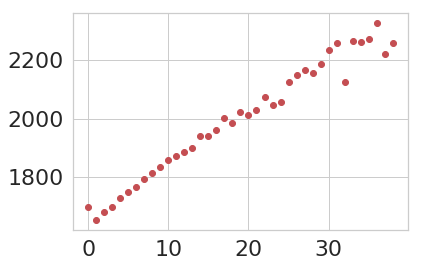

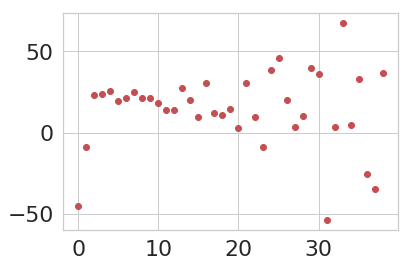

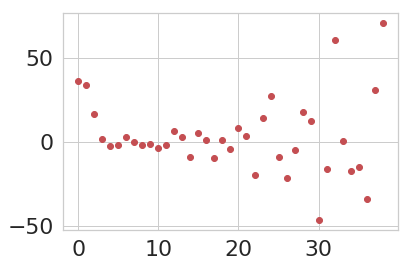

In [53]:
gmm, transformed_norm, pipe_norm = compute_best_gmm(analyze_cell_stats_flat[['gc_in','gc_out']].loc[pd.IndexSlice[:, :], :])
labels = gmm.predict(pipe_norm.transform(analyze_cell_stats_flat[['gc_in','gc_out']]))
analyze_cell_stats_flat['gmm'] = labels

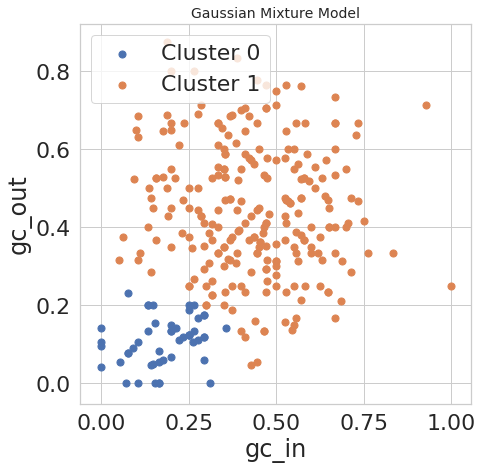

In [54]:
def plot_3d_data(df ,labels, title="Gaussian Mixture Model"):
    from mpl_toolkits.mplot3d import Axes3D

    #Plotting
    fig = plt.figure(1, figsize=(7,7))
    ax = fig.add_subplot(1, 1, 1)
    for label in range(max(labels)+1):
        colored_tuples = labels[labels==label]
        ax.scatter(df[labels == label].iloc[:, 0], df[labels == label].iloc[:, 1],
                  s=50, label='Cluster ' + str(label))
    ax.set_xlabel(df.columns[0])
    ax.set_ylabel(df.columns[1])    
    plt.title(title, fontsize=14)
    plt.legend(loc=2)
    plt.show()

plot_3d_data(pd.DataFrame(analyze_cell_stats_flat[['gc_in','gc_out']]), labels)

## Cluster Description

In [55]:
gmm_cluster_means = pd.DataFrame(data = {'Followership': gmm.means_[:, 0], 'Leadership': gmm.means_[:, 1]})

#gmm_cluster_means['Cluster'] = gmm_cluster_means.index

gmm_cluster_means = gmm_cluster_means.transpose()

gmm_cluster_means['Feature'] = gmm_cluster_means.index

gmm_cluster_means = gmm_cluster_means.melt(id_vars="Feature", var_name="Cluster", value_name="Mean")

gmm_cluster_means

,Feature,Cluster,Mean
0,Followership,0,-1.081480
1,Leadership,0,-1.401263
2,Followership,1,0.210628
3,Leadership,1,0.272909


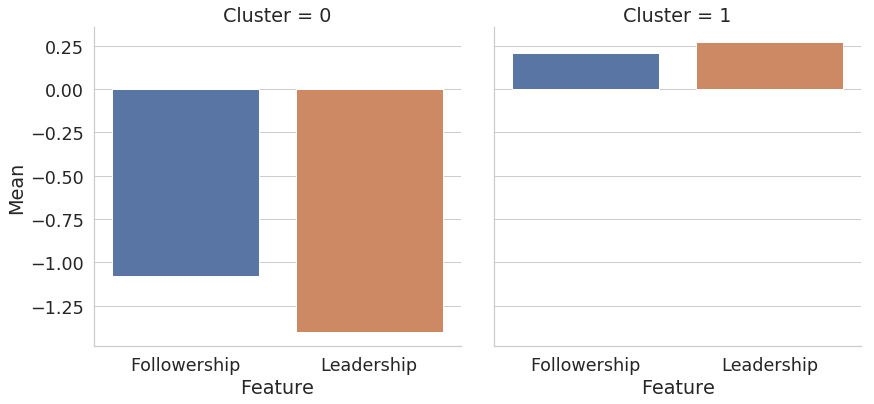

In [56]:
sns.set(style='whitegrid', font_scale = 1.6, rc={"lines.linewidth": 1})

g = sns.FacetGrid(gmm_cluster_means, col="Cluster", col_wrap=3, height=6)
g.map(sns.barplot, "Feature", "Mean", order=gmm_cluster_means.Feature.unique(), palette=sns.color_palette())

plt.show()

sns.set()

## Build state matrix

In [57]:
def transition_matrix(data):
    number_of_states = data.values.max() + 1
    
    M = np.zeros((number_of_states, number_of_states))
    
    for node_idx in range(data.shape[1]):
        for (i,j) in zip(data.iloc[:, node_idx], data.iloc[1:, node_idx]):
            M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

def create_state_convert_binning_func(number_of_bins):
    def state_convert_func(data):
        bins = np.linspace(0, 0.5, number_of_bins + 1)
        
        number_of_rows = data.shape[0]
        
        result = np.zeros((number_of_rows), dtype=int)
        
        for row in range(number_of_rows):
            result[row] = convert_to_state(data[row, 1:], bins)
            
        return result
        
    return state_convert_func

def create_state_convert_binning_kmeans_func(k_bins_discretizer, pipe):
    def state_convert_func(data):
        model_params = k_bins_discretizer.get_params()
        n_bins = model_params['n_bins']
        number_of_rows = data.shape[0]
        
        transformed = pipe.transform(data)
        
        transformed = k_bins_discretizer.transform(transformed[:, 1:])
        
        result = np.zeros((number_of_rows), dtype=int)
        
        for row in range(number_of_rows):
            result[row] = convert_to_state_without_discretization(transformed[row], n_bins)        
        
        return result
        
    return state_convert_func

def create_state_convert_gmm_func(gmm, pipe):
    def state_convert_func(data):        
        transformed = pipe.transform(data)
        result = gmm.predict(transformed)        
            
        return result
        
    return state_convert_func

def convert_to_state(features, bins):
    number_of_features = len(features)
    number_of_bins = len(bins)    
    bins_data = np.digitize(features, bins[:-1])    
    bins_data = bins_data - 1
    
    result = 0
    
    for feature_index in range(number_of_features):        
        result += bins_data[feature_index]*((number_of_bins - 1)**(number_of_features - 1 - feature_index))
    
    return result

def convert_to_state_without_discretization(bins_data, number_of_bins):
    number_of_bins = number_of_bins
    number_of_features = len(bins_data)
    result = 0
    
    for feature_index in range(number_of_features):        
        result += bins_data[feature_index]*((number_of_bins - 1)**(number_of_features - 1 - feature_index))
    
    return result

## Explore each threshold

In [58]:
from matplotlib import colors

def background_gradient(s, m, M, cmap, low=0, high=0):
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

def plot_pretty_transition_matrix(df, cmap='viridis'):
    df = df.round(2)
    df = df.style.apply(background_gradient,
               cmap=cmap,
               m=df.median().min(),
               M=df.median().max(),
               low=0,
               high=1).applymap(color_text).set_properties(**{'max-width': '100px', 'font-size': '11pt'})
    
    return df
    
def color_text(value):
    if value < 0.10:
        color = 'white'
    else:
        color = 'black'

    return 'color: %s' % color

def distribution_cell_states(cell_states):
    return cell_states / sum(cell_states)

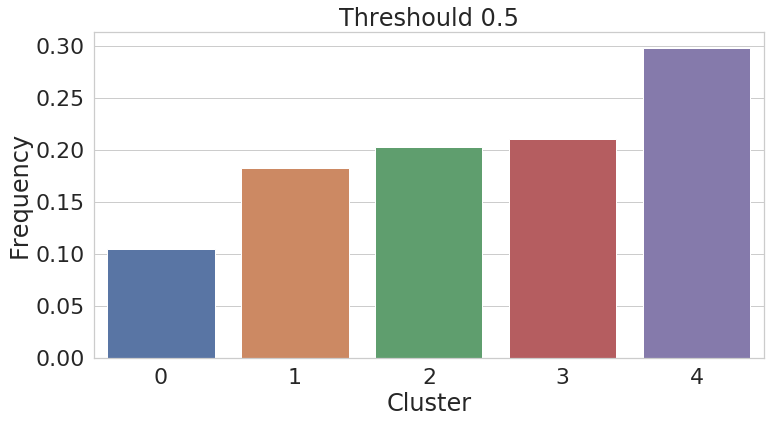

part,0.0
0,0.11
1,0.18
2,0.2
3,0.21
4,0.3


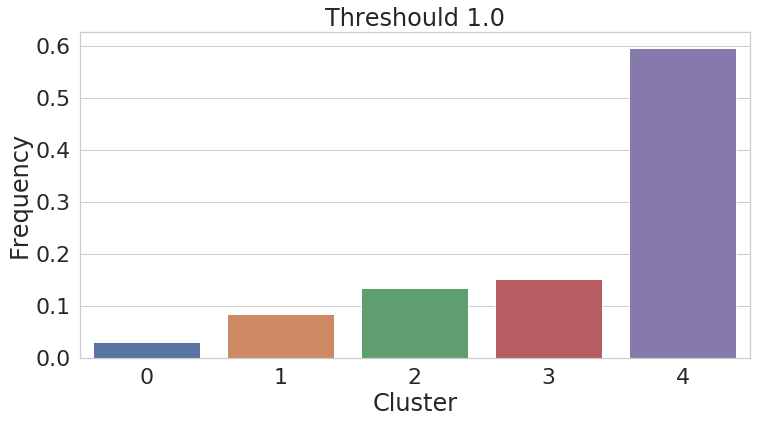

part,0.0
0,0.03
1,0.08
2,0.14
3,0.15
4,0.6


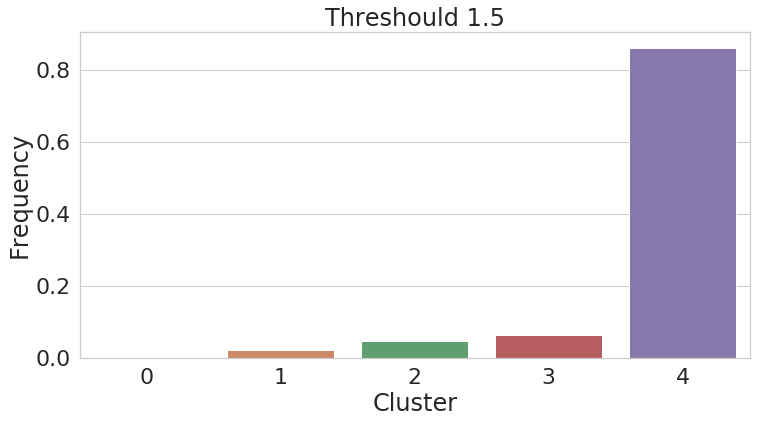

part,0.0
0,0
1,0.02
2,0.05
3,0.06
4,0.86


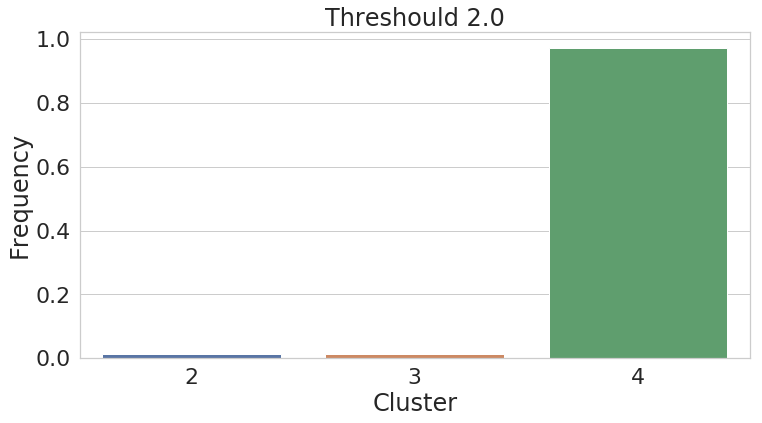

part,0.0
0,0
1,0
2,0.01
3,0.01
4,0.97


In [59]:
from IPython.core.display import display, HTML

for threshould in range(1, 5):
    threshould_i = threshould / 2
    state_matrix = analyze_cell_stats_flat.unstack()['Manual_' + str(threshould_i)].transpose()
    #state_matrix = build_state_matrix_all(score_for_parts, activation_time_feature_scores, create_state_convert_binning_func(3))
    #state_matrix = build_state_matrix_all(score_for_parts, activation_time_feature_scores, create_state_convert_binning_kmeans_func(enc, pipe_norm))    
    
    ## Frequency Mode    
    unique_elements, counts_elements = np.unique(state_matrix.values.flatten(), return_counts=True)

    sns.set(style='whitegrid', font_scale = 2, rc={"lines.linewidth": 4})

    fig, ax = plt.subplots(figsize=(12,6))
    plt.title('Threshould ' + str(threshould_i))
    ax = sns.barplot(x=unique_elements, y=counts_elements / sum(counts_elements))
    plt.ylabel('Frequency')
    plt.xlabel('Cluster')
    plt.show()
    sns.set()
    
    
    ## Frequency mode during time    
    state_matrix_pp = state_matrix.transpose().apply(lambda cell_states:                               
                                   np.bincount(cell_states, minlength=len(unique_elements)), 
                               axis=0)

    state_matrix_pp.to_excel(base_path_artifacts + "state_frequency_during_time.xlsx")

    state_matrix_pp = state_matrix_pp.round(2).apply(lambda cell_states: distribution_cell_states(cell_states), axis=0).round(2)#\
    #.style.background_gradient(cmap='viridis', axis=0).applymap(color_text).set_properties(**{'max-width': '100px', 'font-size': '11pt'})
    
    display(HTML(plot_pretty_transition_matrix(state_matrix_pp, cmap='Blues').render()))